In [1]:
%cd /scratch/mt/ashapiro/Hate_Speech/extra_data

/scratch/mt/ashapiro/Hate_Speech/extra_data


In [2]:
from contrastive_utils import *

In [3]:
train, test = getData(sub_task="A", return_type="pandas", pre_proccessed=True)

In [5]:
model = SentenceTransformer("UBC-NLP/MARBERTv2")

Some weights of the model checkpoint at /home/ashapiro/.cache/torch/sentence_transformers/UBC-NLP_MARBERTv2 were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# Testing The distribution

### Baseline Marbertv2

Batches: 100%|██████████| 179/179 [00:02<00:00, 59.92it/s]


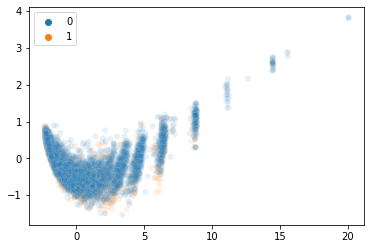

In [16]:
plot_representation(model, train)

### Classification Trained Marbert

Batches:   0%|          | 0/100 [00:00<?, ?it/s]

Batches:   0%|          | 0/179 [00:00<?, ?it/s]

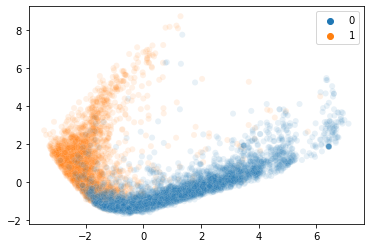

In [7]:
plot_representation(model, train)

Batches:   0%|          | 0/13 [00:00<?, ?it/s]

Batches:   0%|          | 0/28 [00:00<?, ?it/s]

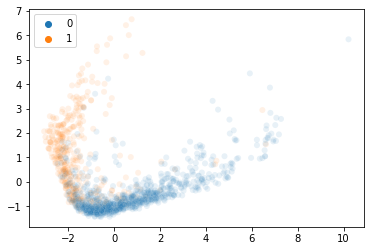

In [8]:
plot_representation(model, test)

# Contrastive Learning

<code> 
train_examples = [
    InputExample(texts=['This is a positive pair', 'Where the distance will be minimized'], label=1),
    InputExample(texts=['This is a negative pair', 'Their distance will be increased'], label=0)
    ]
    </code>

## Contrastive Loss 50K

In [6]:
%cd /scratch/mt/ashapiro/Hate_Speech/extra_data
%load_ext autoreload
%autoreload 2
from contrastive_utils import *

distance_metric = losses.SiameseDistanceMetric.COSINE_DISTANCE
margin = 0.7

train, test = getData(sub_task="A", return_type='pandas', pre_proccessed=True)

train_data = make_contranstive_data(data= train, size='50K')
val_data = make_contranstive_data(data= test, size='10K')

model = SentenceTransformer("/scratch/mt/ashapiro/Hate_Speech/Models/Marbertv2")
binary_evaluator = evaluation.BinaryClassificationEvaluator.from_input_examples(val_data)
train_dataloader = DataLoader(train_data, shuffle=True, batch_size=32)
train_loss = losses.ContrastiveLoss(model=model, distance_metric=distance_metric, margin=margin)
model.fit(train_objectives=[(train_dataloader, train_loss)],
          evaluator = binary_evaluator, 
          epochs=4,
          warmup_steps=1000,
          output_path="./Checkpoints/SentenceBert/MarbertV2_Contrastive_50K",
          save_best_model = True
          )

/scratch/mt/ashapiro/Hate_Speech/extra_data


  0%|          | 0/25000 [00:00<?, ?it/s]

  0%|          | 0/25000 [00:00<?, ?it/s]

Total Data Length 50000
Ratio Between Negative and Positive Samples = 1.0


  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

Total Data Length 10000
Ratio Between Negative and Positive Samples = 1.0


Some weights of the model checkpoint at /scratch/mt/ashapiro/Hate_Speech/Models/Marbertv2 were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/home/ashapiro/.local/lib/python3.8/site-packages/transformers/optimization.py:306: FutureW

Batches: 100%|██████████| 165/165 [00:02<00:00, 59.18it/s]


[0.98913425 0.9905858 ]


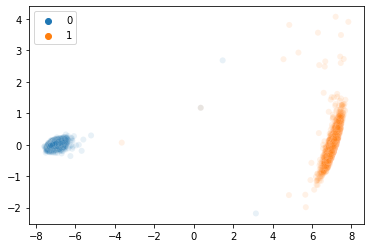

In [7]:
plot_representation(model, train)

Batches: 100%|██████████| 179/179 [00:03<00:00, 51.43it/s]


[0.987965  0.9892653]


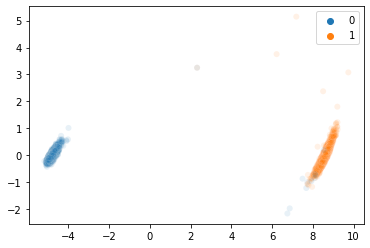

In [3]:
plot_representation(model, train)

Batches: 100%|██████████| 28/28 [00:00<00:00, 47.03it/s]


[0.95865047 0.97208804]


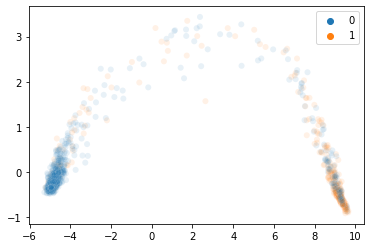

In [9]:
plot_representation(model, test)

Batches: 100%|██████████| 28/28 [00:00<00:00, 55.35it/s]


[0.96226066 0.97580713]


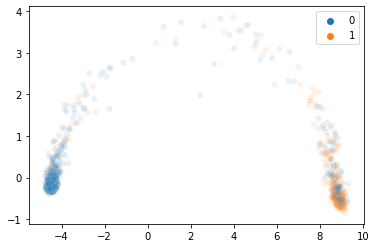

In [4]:
plot_representation(model, test)

### Classifier Trial , F1 = 0.8496723737053478
"/scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_50K/checkpoint-1251"

In [10]:
model_checkpoint = "/scratch/mt/ashapiro/Hate_Speech/extra_data/Checkpoints/SentenceBert/MarbertV2_Contrastive_50K"
output_dir = "/scratch/mt/ashapiro/Hate_Speech/extra_data/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_50K"
trainer = run_linearclassifier(model_checkpoint, output_dir, batch_size=64, epochs=100, es_patience = 10, my_classifier_dropout=0.3)
trainer.train()


Pre-Processed


Extracting data files: 100%|██████████| 2/2 [00:00<00:00, 75.48it/s]


Dataset csv downloaded and prepared to /home/ashapiro/.cache/huggingface/datasets/csv/default-cfabc91576db65bf/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


100%|██████████| 2/2 [00:00<00:00, 26.81ba/s]
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at /scratch/mt/ashapiro/Hate_Speech/extra_data/Checkpoints/SentenceBert/MarbertV2_Contrastive_50K and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
The following columns in the training set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
/home/ashapiro/.local/lib/python3.8/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Ru

  1%|          | 165/16500 [00:06<08:31, 31.94it/s]The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 99%|█████████▉| 315/318 [00:04<00:00, 52.97it/s]
                                                   
  1%|          | 165/16500 [00:10<08:31, 31.94it/s]A
                                                 Saving model checkpoint to /scratch/mt/ashapiro/Hate_Speech/extra_data/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_50K/checkpoint-165
Configuration saved in /scratch/mt/ashapiro/Hate_Speech/extra_data/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_50K/checkpoint-165/config.json


{'eval_loss': 0.5542117357254028, 'eval_f1': 0.8413229511008711, 'eval_recall': 0.8456457366290902, 'eval_precision': 0.8375255735023627, 'eval_runtime': 4.3615, 'eval_samples_per_second': 291.188, 'eval_steps_per_second': 72.912, 'epoch': 1.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/extra_data/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_50K/checkpoint-165/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/extra_data/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_50K/checkpoint-165/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/extra_data/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_50K/checkpoint-165/special_tokens_map.json
  2%|▏         | 330/16500 [00:18<07:12, 37.41it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 97%|█████████▋| 310/318 [00:03<00:00, 83.13it/s]
                                                   
  

{'eval_loss': 0.5553210973739624, 'eval_f1': 0.838140121773382, 'eval_recall': 0.8433362678069193, 'eval_precision': 0.8337055958839985, 'eval_runtime': 3.8638, 'eval_samples_per_second': 328.693, 'eval_steps_per_second': 82.303, 'epoch': 2.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/extra_data/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_50K/checkpoint-330/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/extra_data/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_50K/checkpoint-330/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/extra_data/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_50K/checkpoint-330/special_tokens_map.json
  3%|▎         | 495/16500 [00:29<07:09, 37.28it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 98%|█████████▊| 311/318 [00:03<00:00, 77.04it/s]
                                                   
  

{'eval_loss': 0.5405141711235046, 'eval_f1': 0.8403217026357842, 'eval_recall': 0.8464717718885053, 'eval_precision': 0.8352184265325254, 'eval_runtime': 3.7993, 'eval_samples_per_second': 334.272, 'eval_steps_per_second': 83.7, 'epoch': 3.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/extra_data/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_50K/checkpoint-495/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/extra_data/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_50K/checkpoint-495/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/extra_data/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_50K/checkpoint-495/special_tokens_map.json
  3%|▎         | 502/16500 [00:35<1:27:55,  3.03it/s]

{'loss': 0.0882, 'learning_rate': 0.0009696969696969698, 'epoch': 3.03}


  4%|▍         | 660/16500 [00:41<06:58, 37.86it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 97%|█████████▋| 310/318 [00:03<00:00, 88.35it/s]
                                                   
  4%|▍         | 660/16500 [00:45<06:58, 37.86it/s]A
                                                 Saving model checkpoint to /scratch/mt/ashapiro/Hate_Speech/extra_data/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_50K/checkpoint-660
Configuration saved in /scratch/mt/ashapiro/Hate_Speech/extra_data/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_50K/checkpoint-660/config.json


{'eval_loss': 0.5413288474082947, 'eval_f1': 0.8403217026357842, 'eval_recall': 0.8464717718885053, 'eval_precision': 0.8352184265325254, 'eval_runtime': 3.8069, 'eval_samples_per_second': 333.603, 'eval_steps_per_second': 83.532, 'epoch': 4.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/extra_data/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_50K/checkpoint-660/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/extra_data/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_50K/checkpoint-660/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/extra_data/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_50K/checkpoint-660/special_tokens_map.json
  5%|▍         | 824/16500 [00:52<06:21, 41.06it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

100%|█████████▉| 317/318 [00:03<00:00, 83.96it/s]
                                                   
  

{'eval_loss': 0.49762260913848877, 'eval_f1': 0.8404428479705692, 'eval_recall': 0.8512593464889213, 'eval_precision': 0.8327106497838205, 'eval_runtime': 3.8931, 'eval_samples_per_second': 326.218, 'eval_steps_per_second': 81.683, 'epoch': 5.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/extra_data/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_50K/checkpoint-825/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/extra_data/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_50K/checkpoint-825/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/extra_data/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_50K/checkpoint-825/special_tokens_map.json
  6%|▌         | 987/16500 [01:03<06:33, 39.42it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 98%|█████████▊| 311/318 [00:03<00:00, 91.94it/s]
                                                   
  

{'eval_loss': 0.5436142683029175, 'eval_f1': 0.8401081053859647, 'eval_recall': 0.847875174353463, 'eval_precision': 0.8339836889708465, 'eval_runtime': 3.6466, 'eval_samples_per_second': 348.274, 'eval_steps_per_second': 87.206, 'epoch': 6.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/extra_data/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_50K/checkpoint-990/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/extra_data/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_50K/checkpoint-990/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/extra_data/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_50K/checkpoint-990/special_tokens_map.json
  6%|▌         | 1004/16500 [01:09<40:00,  6.46it/s]  

{'loss': 0.0772, 'learning_rate': 0.0009393939393939394, 'epoch': 6.06}


  7%|▋         | 1154/16500 [01:14<06:08, 41.59it/s]The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 98%|█████████▊| 312/318 [00:03<00:00, 62.47it/s]
                                                    
  7%|▋         | 1155/16500 [01:19<06:08, 41.59it/s]
                                                 Saving model checkpoint to /scratch/mt/ashapiro/Hate_Speech/extra_data/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_50K/checkpoint-1155
Configuration saved in /scratch/mt/ashapiro/Hate_Speech/extra_data/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_50K/checkpoint-1155/config.json


{'eval_loss': 0.5137489438056946, 'eval_f1': 0.8395070779005429, 'eval_recall': 0.8479580637047539, 'eval_precision': 0.8329914193260739, 'eval_runtime': 4.1674, 'eval_samples_per_second': 304.744, 'eval_steps_per_second': 76.306, 'epoch': 7.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/extra_data/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_50K/checkpoint-1155/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/extra_data/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_50K/checkpoint-1155/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/extra_data/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_50K/checkpoint-1155/special_tokens_map.json
  8%|▊         | 1318/16500 [01:26<06:09, 41.11it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 98%|█████████▊| 313/318 [00:03<00:00, 84.98it/s]
                                                  

{'eval_loss': 0.5469432473182678, 'eval_f1': 0.8394687202224684, 'eval_recall': 0.8500217227265452, 'eval_precision': 0.831869918699187, 'eval_runtime': 3.8774, 'eval_samples_per_second': 327.536, 'eval_steps_per_second': 82.013, 'epoch': 8.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/extra_data/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_50K/checkpoint-1320/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/extra_data/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_50K/checkpoint-1320/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/extra_data/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_50K/checkpoint-1320/special_tokens_map.json
  9%|▉         | 1482/16500 [01:37<08:02, 31.10it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 98%|█████████▊| 312/318 [00:03<00:00, 77.36it/s]
                                                  

{'eval_loss': 0.524551510810852, 'eval_f1': 0.8392825356562758, 'eval_recall': 0.8493614661697116, 'eval_precision': 0.8319131256517205, 'eval_runtime': 3.9348, 'eval_samples_per_second': 322.76, 'eval_steps_per_second': 80.817, 'epoch': 9.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/extra_data/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_50K/checkpoint-1485/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/extra_data/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_50K/checkpoint-1485/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/extra_data/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_50K/checkpoint-1485/special_tokens_map.json
  9%|▉         | 1504/16500 [01:44<26:47,  9.33it/s]  

{'loss': 0.0776, 'learning_rate': 0.0009090909090909091, 'epoch': 9.09}


 10%|▉         | 1649/16500 [01:49<07:20, 33.71it/s]The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

100%|█████████▉| 317/318 [00:04<00:00, 87.98it/s]
                                                    
 10%|█         | 1650/16500 [01:53<07:20, 33.71it/s]
                                                 Saving model checkpoint to /scratch/mt/ashapiro/Hate_Speech/extra_data/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_50K/checkpoint-1650
Configuration saved in /scratch/mt/ashapiro/Hate_Speech/extra_data/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_50K/checkpoint-1650/config.json


{'eval_loss': 0.5481014847755432, 'eval_f1': 0.8402988911741035, 'eval_recall': 0.8485354309102966, 'eval_precision': 0.8338992332968236, 'eval_runtime': 4.1243, 'eval_samples_per_second': 307.928, 'eval_steps_per_second': 77.103, 'epoch': 10.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/extra_data/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_50K/checkpoint-1650/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/extra_data/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_50K/checkpoint-1650/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/extra_data/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_50K/checkpoint-1650/special_tokens_map.json
 11%|█         | 1812/16500 [02:01<06:46, 36.12it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 97%|█████████▋| 309/318 [00:03<00:00, 87.26it/s]
                                                  

{'eval_loss': 0.4878714978694916, 'eval_f1': 0.8408079341874084, 'eval_recall': 0.8525798596025884, 'eval_precision': 0.8326501719139756, 'eval_runtime': 3.8098, 'eval_samples_per_second': 333.348, 'eval_steps_per_second': 83.468, 'epoch': 11.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/extra_data/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_50K/checkpoint-1815/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/extra_data/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_50K/checkpoint-1815/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/extra_data/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_50K/checkpoint-1815/special_tokens_map.json


Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from /scratch/mt/ashapiro/Hate_Speech/extra_data/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_50K/checkpoint-165 (score: 0.8413229511008711).
 11%|█         | 1815/16500 [02:07<17:08, 14.27it/s]

{'train_runtime': 132.3819, 'train_samples_per_second': 7970.88, 'train_steps_per_second': 124.639, 'train_loss': 0.0806890240713913, 'epoch': 11.0}


TrainOutput(global_step=1815, training_loss=0.0806890240713913, metrics={'train_runtime': 132.3819, 'train_samples_per_second': 7970.88, 'train_steps_per_second': 124.639, 'train_loss': 0.0806890240713913, 'epoch': 11.0})

## Contrastive 250K 

In [1]:
%cd /scratch/mt/ashapiro/Hate_Speech/
%load_ext autoreload
%autoreload 2
from contrastive_utils import *

distance_metric = losses.SiameseDistanceMetric.COSINE_DISTANCE
margin = 0.7

train, test = getData(sub_task="A", return_type='pandas', pre_proccessed=True)

train_data = make_contranstive_data(data= train, size='250K')
val_data = make_contranstive_data(data= test, size='10K')

model = SentenceTransformer("/scratch/mt/ashapiro/Hate_Speech/Models/Marbertv2")
binary_evaluator = evaluation.BinaryClassificationEvaluator.from_input_examples(val_data)
train_dataloader = DataLoader(train_data, shuffle=True, batch_size=128)
train_loss = losses.ContrastiveLoss(model=model, distance_metric=distance_metric, margin=margin)
model.fit(train_objectives=[(train_dataloader, train_loss)],
          evaluator = binary_evaluator, 
          epochs=10,
          warmup_steps=1000,
          output_path="./Checkpoints/SentenceBert/MarbertV2_Contrastive_250K",
          save_best_model = True
          )

/scratch/mt/ashapiro/Hate_Speech


  0%|          | 0/125000 [00:00<?, ?it/s]

  0%|          | 0/125000 [00:00<?, ?it/s]

Total Data Length 250000
Ratio Between Negative and Positive Samples = 1.0


  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

Total Data Length 10000
Ratio Between Negative and Positive Samples = 1.0


Some weights of the model checkpoint at /scratch/mt/ashapiro/Hate_Speech/Models/Marbertv2 were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/home/ashapiro/.local/lib/python3.8/site-packages/transformers/optimization.py:306: FutureW

KeyboardInterrupt: 

Batches: 100%|██████████| 179/179 [00:03<00:00, 58.16it/s]


[0.9929562 0.9935251]


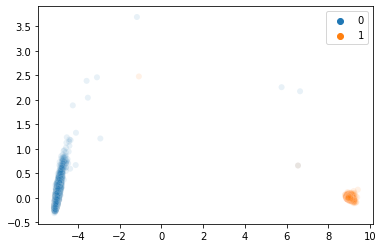

In [3]:
plot_representation(model, train)

Batches: 100%|██████████| 28/28 [00:00<00:00, 56.63it/s]


[0.9684888 0.9800504]


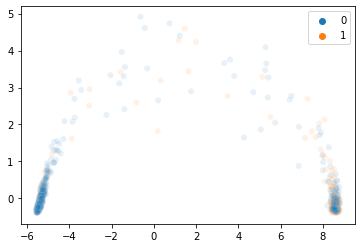

In [4]:
plot_representation(model, test)

### Classifier Trial, F1 = 0.833176165416236
"/scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_250K/checkpoint-417"

In [26]:
model_checkpoint = "/scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/MarbertV2_Contrastive_250K"
output_dir = "/scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_250K"
trainer = run_linearclassifier(model_checkpoint, output_dir, batch_size=64, epochs=100, es_patience = 10, my_classifier_dropout=0.3)
trainer.train()


Pre-Processed


100%|██████████| 2/2 [00:00<00:00, 332.24it/s]
Didn't find file /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/MarbertV2_Contrastive_250K/added_tokens.json. We won't load it.
loading file /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/MarbertV2_Contrastive_250K/vocab.txt
loading file /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/MarbertV2_Contrastive_250K/tokenizer.json
loading file None
loading file /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/MarbertV2_Contrastive_250K/special_tokens_map.json
loading file /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/MarbertV2_Contrastive_250K/tokenizer_config.json
100%|██████████| 2/2 [00:00<00:00, 38.38ba/s]
loading configuration file /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/MarbertV2_Contrastive_250K/config.json
Model config BertConfig {
  "_name_or_path": "/scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/MarbertV2_Contrastive_250K",
  "architectures": [
    "Bert

{'eval_loss': 1.0918445587158203, 'eval_f1': 0.8306079906716829, 'eval_recall': 0.845074085930533, 'eval_precision': 0.8216557964064198, 'eval_runtime': 4.467, 'eval_samples_per_second': 284.308, 'eval_steps_per_second': 71.189, 'epoch': 1.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_250K/checkpoint-139/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_250K/checkpoint-139/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_250K/checkpoint-139/special_tokens_map.json
  2%|▏         | 277/13900 [00:16<07:13, 31.41it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

100%|██████████| 318/318 [00:04<00:00, 70.68it/s]
                                                   
  2%|▏         | 278/13900 [00:2

{'eval_loss': 0.944361686706543, 'eval_f1': 0.8323925842856561, 'eval_recall': 0.8448254178766605, 'eval_precision': 0.8240895207240315, 'eval_runtime': 4.3587, 'eval_samples_per_second': 291.371, 'eval_steps_per_second': 72.957, 'epoch': 2.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_250K/checkpoint-278/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_250K/checkpoint-278/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_250K/checkpoint-278/special_tokens_map.json
  3%|▎         | 415/13900 [00:26<06:55, 32.43it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 98%|█████████▊| 313/318 [00:04<00:00, 74.65it/s]
                                                   
  3%|▎         | 417/13900 [00:3

{'eval_loss': 1.4177250862121582, 'eval_f1': 0.8331761654162368, 'eval_recall': 0.8454027850822033, 'eval_precision': 0.8249403058919698, 'eval_runtime': 4.398, 'eval_samples_per_second': 288.767, 'eval_steps_per_second': 72.305, 'epoch': 3.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_250K/checkpoint-417/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_250K/checkpoint-417/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_250K/checkpoint-417/special_tokens_map.json
  4%|▎         | 502/13900 [00:36<09:28, 23.57it/s]  

{'loss': 0.0208, 'learning_rate': 0.0009640287769784173, 'epoch': 3.6}


  4%|▍         | 553/13900 [00:38<07:18, 30.43it/s]The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

100%|█████████▉| 317/318 [00:04<00:00, 77.16it/s]
                                                   
  4%|▍         | 556/13900 [00:43<07:18, 30.43it/s]A
                                                 Saving model checkpoint to /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_250K/checkpoint-556
Configuration saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_250K/checkpoint-556/config.json


{'eval_loss': 1.1866326332092285, 'eval_f1': 0.8322033675539682, 'eval_recall': 0.8441651613198271, 'eval_precision': 0.8240853633919272, 'eval_runtime': 4.2854, 'eval_samples_per_second': 296.356, 'eval_steps_per_second': 74.206, 'epoch': 4.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_250K/checkpoint-556/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_250K/checkpoint-556/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_250K/checkpoint-556/special_tokens_map.json
  5%|▍         | 693/13900 [00:49<06:38, 33.12it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 98%|█████████▊| 313/318 [00:04<00:00, 72.40it/s]
                                                   
  5%|▌         | 695/13900 [00:5

{'eval_loss': 0.8864886164665222, 'eval_f1': 0.8322033675539682, 'eval_recall': 0.8441651613198271, 'eval_precision': 0.8240853633919272, 'eval_runtime': 4.3977, 'eval_samples_per_second': 288.785, 'eval_steps_per_second': 72.31, 'epoch': 5.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_250K/checkpoint-695/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_250K/checkpoint-695/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_250K/checkpoint-695/special_tokens_map.json
  6%|▌         | 834/13900 [01:00<06:48, 31.97it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

100%|█████████▉| 317/318 [00:04<00:00, 75.53it/s]
                                                   
  6%|▌         | 834/13900 [01:0

{'eval_loss': 0.868455708026886, 'eval_f1': 0.8327669733903899, 'eval_recall': 0.8461459309903276, 'eval_precision': 0.824118605827519, 'eval_runtime': 4.3806, 'eval_samples_per_second': 289.916, 'eval_steps_per_second': 72.593, 'epoch': 6.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_250K/checkpoint-834/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_250K/checkpoint-834/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_250K/checkpoint-834/special_tokens_map.json
  7%|▋         | 971/13900 [01:11<06:55, 31.10it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 99%|█████████▉| 316/318 [00:04<00:00, 74.99it/s]
                                                   
  7%|▋         | 973/13900 [01:1

{'eval_loss': 1.1829941272735596, 'eval_f1': 0.8327970087779838, 'eval_recall': 0.8440822719685364, 'eval_precision': 0.8249492528288849, 'eval_runtime': 4.291, 'eval_samples_per_second': 295.969, 'eval_steps_per_second': 74.109, 'epoch': 7.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_250K/checkpoint-973/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_250K/checkpoint-973/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_250K/checkpoint-973/special_tokens_map.json
  7%|▋         | 1004/13900 [01:18<12:23, 17.34it/s] 

{'loss': 0.0146, 'learning_rate': 0.0009280575539568345, 'epoch': 7.19}


  8%|▊         | 1112/13900 [01:22<06:36, 32.29it/s]The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 98%|█████████▊| 313/318 [00:04<00:00, 70.85it/s]
                                                    
  8%|▊         | 1112/13900 [01:27<06:36, 32.29it/s]
                                                 Saving model checkpoint to /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_250K/checkpoint-1112
Configuration saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_250K/checkpoint-1112/config.json


{'eval_loss': 1.0563842058181763, 'eval_f1': 0.8304219147911074, 'eval_recall': 0.8444138293736995, 'eval_precision': 0.8216161680866056, 'eval_runtime': 4.3965, 'eval_samples_per_second': 288.865, 'eval_steps_per_second': 72.33, 'epoch': 8.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_250K/checkpoint-1112/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_250K/checkpoint-1112/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_250K/checkpoint-1112/special_tokens_map.json
  9%|▉         | 1248/13900 [01:33<05:38, 37.42it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

100%|█████████▉| 317/318 [00:04<00:00, 75.06it/s]
                                                    
  9%|▉         | 1251/13900

{'eval_loss': 0.7734454870223999, 'eval_f1': 0.8327970087779838, 'eval_recall': 0.8440822719685364, 'eval_precision': 0.8249492528288849, 'eval_runtime': 4.3613, 'eval_samples_per_second': 291.198, 'eval_steps_per_second': 72.914, 'epoch': 9.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_250K/checkpoint-1251/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_250K/checkpoint-1251/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_250K/checkpoint-1251/special_tokens_map.json
 10%|█         | 1390/13900 [01:44<07:10, 29.04it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 98%|█████████▊| 313/318 [00:04<00:00, 79.06it/s]
                                                    
 10%|█         | 1390/13900

{'eval_loss': 0.9694947004318237, 'eval_f1': 0.8322033675539682, 'eval_recall': 0.8441651613198271, 'eval_precision': 0.8240853633919272, 'eval_runtime': 4.1941, 'eval_samples_per_second': 302.809, 'eval_steps_per_second': 75.822, 'epoch': 10.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_250K/checkpoint-1390/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_250K/checkpoint-1390/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_250K/checkpoint-1390/special_tokens_map.json
 11%|█         | 1503/13900 [01:54<09:13, 22.39it/s]  

{'loss': 0.0139, 'learning_rate': 0.0008920863309352518, 'epoch': 10.79}


 11%|█         | 1529/13900 [01:55<06:31, 31.62it/s]The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 97%|█████████▋| 310/318 [00:04<00:00, 80.69it/s]
                                                    
 11%|█         | 1529/13900 [01:59<06:31, 31.62it/s]
                                                 Saving model checkpoint to /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_250K/checkpoint-1529
Configuration saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_250K/checkpoint-1529/config.json


{'eval_loss': 0.9564068913459778, 'eval_f1': 0.8327970087779838, 'eval_recall': 0.8440822719685364, 'eval_precision': 0.8249492528288849, 'eval_runtime': 4.1927, 'eval_samples_per_second': 302.909, 'eval_steps_per_second': 75.846, 'epoch': 11.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_250K/checkpoint-1529/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_250K/checkpoint-1529/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_250K/checkpoint-1529/special_tokens_map.json
 12%|█▏        | 1666/13900 [02:06<06:12, 32.80it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

100%|█████████▉| 317/318 [00:04<00:00, 74.66it/s]
                                                    
 12%|█▏        | 1668/13900

{'eval_loss': 0.8579018712043762, 'eval_f1': 0.8327970087779838, 'eval_recall': 0.8440822719685364, 'eval_precision': 0.8249492528288849, 'eval_runtime': 4.1343, 'eval_samples_per_second': 307.183, 'eval_steps_per_second': 76.917, 'epoch': 12.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_250K/checkpoint-1668/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_250K/checkpoint-1668/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_250K/checkpoint-1668/special_tokens_map.json
 13%|█▎        | 1806/13900 [02:16<06:12, 32.42it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

100%|██████████| 318/318 [00:04<00:00, 75.71it/s]
                                                    
 13%|█▎        | 1807/13900

{'eval_loss': 1.0866261720657349, 'eval_f1': 0.8322033675539682, 'eval_recall': 0.8441651613198271, 'eval_precision': 0.8240853633919272, 'eval_runtime': 4.2412, 'eval_samples_per_second': 299.447, 'eval_steps_per_second': 74.98, 'epoch': 13.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_250K/checkpoint-1807/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_250K/checkpoint-1807/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_250K/checkpoint-1807/special_tokens_map.json


Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_Contrastive_250K/checkpoint-417 (score: 0.8331761654162368).
 13%|█▎        | 1807/13900 [02:23<15:59, 12.61it/s]

{'train_runtime': 143.5187, 'train_samples_per_second': 6192.224, 'train_steps_per_second': 96.851, 'train_loss': 0.016014368545962884, 'epoch': 13.0}


TrainOutput(global_step=1807, training_loss=0.016014368545962884, metrics={'train_runtime': 143.5187, 'train_samples_per_second': 6192.224, 'train_steps_per_second': 96.851, 'train_loss': 0.016014368545962884, 'epoch': 13.0})

## Online Contrastive 50K

In [11]:
%cd /scratch/mt/ashapiro/Hate_Speech/
%load_ext autoreload
%autoreload 2
from contrastive_utils import *

distance_metric = losses.SiameseDistanceMetric.COSINE_DISTANCE
margin = 0.7

train, test = getData(sub_task="A", return_type='pandas', pre_proccessed=True)

train_data = make_contranstive_data(data= train, size='50K')
val_data = make_contranstive_data(data= test, size='10K')

model = SentenceTransformer("/scratch/mt/ashapiro/Hate_Speech/Models/Marbertv2")
binary_evaluator = evaluation.BinaryClassificationEvaluator.from_input_examples(val_data)
train_dataloader = DataLoader(train_data, shuffle=True, batch_size=128)
train_loss = losses.OnlineContrastiveLoss(model=model, distance_metric=distance_metric, margin=margin)
model.fit(train_objectives=[(train_dataloader, train_loss)],
          evaluator = binary_evaluator, 
          epochs=10,
          warmup_steps=1000,
          output_path="./Checkpoints/SentenceBert/MarbertV2_OnlineContrastive_50K",
          save_best_model = True
          )


/scratch/mt/ashapiro/Hate_Speech
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


  0%|          | 0/25000 [00:00<?, ?it/s]

  0%|          | 0/25000 [00:00<?, ?it/s]

Total Data Length 50000
Ratio Between Negative and Positive Samples = 1.0


  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

loading configuration file /scratch/mt/ashapiro/Hate_Speech/Models/Marbertv2/config.json
Model config BertConfig {
  "_name_or_path": "/scratch/mt/ashapiro/Hate_Speech/Models/Marbertv2",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformers_version": "4.17.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 100000
}

loading weights file /scra

Total Data Length 10000
Ratio Between Negative and Positive Samples = 1.0


Some weights of the model checkpoint at /scratch/mt/ashapiro/Hate_Speech/Models/Marbertv2 were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of BertModel were initialized from the model checkpoint at /scratch/mt/asha

KeyboardInterrupt: 

In [12]:
model = SentenceTransformer("./Checkpoints/SentenceBert/MarbertV2_OnlineContrastive_50K")

loading configuration file ./Checkpoints/SentenceBert/MarbertV2_OnlineContrastive_50K/config.json
Model config BertConfig {
  "_name_or_path": "./Checkpoints/SentenceBert/MarbertV2_OnlineContrastive_50K/",
  "architectures": [
    "BertModel"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "torch_dtype": "float32",
  "transformers_version": "4.17.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_si

Batches: 100%|██████████| 179/179 [00:03<00:00, 58.10it/s]


[0.85465765 0.86970824]


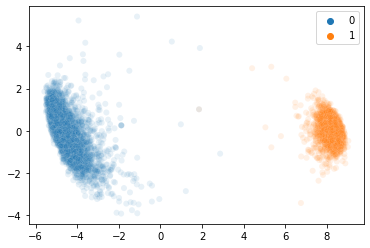

In [13]:
plot_representation(model, train, batch_size=32)

Batches: 100%|██████████| 179/179 [00:03<00:00, 56.98it/s]


[0.8993672 0.9075393]


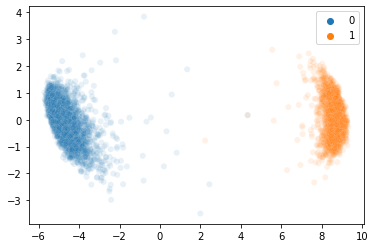

In [6]:
plot_representation(model, train, batch_size=32)

Batches: 100%|██████████| 28/28 [00:00<00:00, 47.15it/s]


[0.7765082  0.81201214]


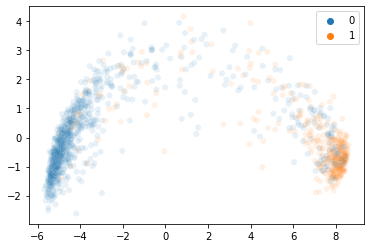

In [14]:
plot_representation(model, test, batch_size=32)

Batches: 100%|██████████| 28/28 [00:00<00:00, 56.41it/s]


[0.8241094 0.8502686]


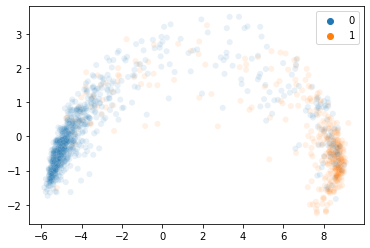

In [7]:
plot_representation(model, test, batch_size=32)

### Classifier Trial, F1 = 0.8509469191784477
"/scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-1807"

In [27]:
model_checkpoint = "/scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/MarbertV2_OnlineContrastive_50K"
output_dir = "/scratch/mt/ashapiro/Hate_Speech/Extra_data/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K"
trainer = run_linearclassifier(model_checkpoint, output_dir, batch_size=64, epochs=100, es_patience = 10, my_classifier_dropout=0.3)
trainer.train()


Pre-Processed


100%|██████████| 2/2 [00:00<00:00, 301.43it/s]
Didn't find file /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/MarbertV2_OnlineContrastive_50K/added_tokens.json. We won't load it.
loading file /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/MarbertV2_OnlineContrastive_50K/vocab.txt
loading file /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/MarbertV2_OnlineContrastive_50K/tokenizer.json
loading file None
loading file /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/MarbertV2_OnlineContrastive_50K/special_tokens_map.json
loading file /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/MarbertV2_OnlineContrastive_50K/tokenizer_config.json
100%|██████████| 2/2 [00:00<00:00, 23.22ba/s]
loading configuration file /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/MarbertV2_OnlineContrastive_50K/config.json
Model config BertConfig {
  "_name_or_path": "/scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/MarbertV2_OnlineContrastive_5

{'eval_loss': 1.7941044569015503, 'eval_f1': 0.8478827591066018, 'eval_recall': 0.8529885898520568, 'eval_precision': 0.8434850811027301, 'eval_runtime': 4.0107, 'eval_samples_per_second': 316.656, 'eval_steps_per_second': 79.289, 'epoch': 1.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-139/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-139/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-139/special_tokens_map.json
  2%|▏         | 276/13900 [00:15<07:40, 29.59it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 98%|█████████▊| 311/318 [00:04<00:00, 79.88it/s]
                                                   
  2%|▏         | 

{'eval_loss': 1.3002804517745972, 'eval_f1': 0.8415971662107216, 'eval_recall': 0.8531572268081311, 'eval_precision': 0.8335195862485963, 'eval_runtime': 4.1758, 'eval_samples_per_second': 304.13, 'eval_steps_per_second': 76.152, 'epoch': 2.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-278/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-278/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-278/special_tokens_map.json
  3%|▎         | 415/13900 [00:26<06:54, 32.53it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

100%|██████████| 318/318 [00:04<00:00, 74.80it/s]
                                                   
  3%|▎         | 

{'eval_loss': 1.199256420135498, 'eval_f1': 0.8470826564820351, 'eval_recall': 0.852411222646514, 'eval_precision': 0.842525995871775, 'eval_runtime': 4.2234, 'eval_samples_per_second': 300.703, 'eval_steps_per_second': 75.294, 'epoch': 3.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-417/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-417/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-417/special_tokens_map.json
  4%|▎         | 502/13900 [00:35<09:08, 24.42it/s]  

{'loss': 0.0101, 'learning_rate': 0.0009640287769784173, 'epoch': 3.6}


  4%|▍         | 554/13900 [00:37<06:55, 32.14it/s]The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 99%|█████████▊| 314/318 [00:04<00:00, 76.56it/s]
                                                   
  4%|▍         | 556/13900 [00:41<06:55, 32.14it/s]A
                                                 Saving model checkpoint to /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-556
Configuration saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-556/config.json


{'eval_loss': 1.381909728050232, 'eval_f1': 0.8444563109446069, 'eval_recall': 0.8520825234948437, 'eval_precision': 0.8383898181698308, 'eval_runtime': 4.2638, 'eval_samples_per_second': 297.854, 'eval_steps_per_second': 74.581, 'epoch': 4.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-556/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-556/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-556/special_tokens_map.json
  5%|▌         | 695/13900 [00:48<06:48, 32.32it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

100%|█████████▉| 317/318 [00:04<00:00, 81.58it/s]
                                                   
  5%|▌         | 

{'eval_loss': 1.1883761882781982, 'eval_f1': 0.8464179687691139, 'eval_recall': 0.8545577710195962, 'eval_precision': 0.8400327294556877, 'eval_runtime': 4.0976, 'eval_samples_per_second': 309.936, 'eval_steps_per_second': 77.606, 'epoch': 5.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-695/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-695/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-695/special_tokens_map.json
  6%|▌         | 832/13900 [00:59<07:03, 30.88it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

100%|██████████| 318/318 [00:04<00:00, 73.20it/s]
                                                   
  6%|▌         | 

{'eval_loss': 1.0949255228042603, 'eval_f1': 0.8468929138710071, 'eval_recall': 0.8517509660896805, 'eval_precision': 0.8426801253045597, 'eval_runtime': 4.232, 'eval_samples_per_second': 300.092, 'eval_steps_per_second': 75.141, 'epoch': 6.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-834/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-834/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-834/special_tokens_map.json
  7%|▋         | 973/13900 [01:10<06:46, 31.81it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

100%|█████████▉| 317/318 [00:04<00:00, 78.60it/s]
                                                   
  7%|▋         | 

{'eval_loss': 1.4431508779525757, 'eval_f1': 0.8468929138710071, 'eval_recall': 0.8517509660896805, 'eval_precision': 0.8426801253045597, 'eval_runtime': 4.1793, 'eval_samples_per_second': 303.878, 'eval_steps_per_second': 76.089, 'epoch': 7.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-973/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-973/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-973/special_tokens_map.json
  7%|▋         | 1006/13900 [01:17<12:51, 16.72it/s] 

{'loss': 0.003, 'learning_rate': 0.0009280575539568345, 'epoch': 7.19}


  8%|▊         | 1110/13900 [01:21<06:41, 31.85it/s]The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

100%|██████████| 318/318 [00:04<00:00, 77.81it/s]
                                                    
  8%|▊         | 1112/13900 [01:26<06:41, 31.85it/s]
                                                 Saving model checkpoint to /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-1112
Configuration saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-1112/config.json


{'eval_loss': 1.32161283493042, 'eval_f1': 0.8432841890349413, 'eval_recall': 0.8501846431756339, 'eval_precision': 0.8376761184486141, 'eval_runtime': 4.2984, 'eval_samples_per_second': 295.456, 'eval_steps_per_second': 73.98, 'epoch': 8.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-1112/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-1112/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-1112/special_tokens_map.json
  9%|▉         | 1248/13900 [01:32<05:27, 38.61it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 98%|█████████▊| 312/318 [00:04<00:00, 76.61it/s]
                                                    
  9%|▉      

{'eval_loss': 1.4426981210708618, 'eval_f1': 0.8444563109446069, 'eval_recall': 0.8520825234948437, 'eval_precision': 0.8383898181698308, 'eval_runtime': 4.2464, 'eval_samples_per_second': 299.074, 'eval_steps_per_second': 74.886, 'epoch': 9.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-1251/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-1251/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-1251/special_tokens_map.json
 10%|▉         | 1388/13900 [01:43<06:14, 33.38it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 99%|█████████▉| 315/318 [00:03<00:00, 78.13it/s]
                                                    
 10%|█      

{'eval_loss': 1.0059940814971924, 'eval_f1': 0.8475777392605246, 'eval_recall': 0.856455651338806, 'eval_precision': 0.8407627822589459, 'eval_runtime': 4.0975, 'eval_samples_per_second': 309.947, 'eval_steps_per_second': 77.609, 'epoch': 10.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-1390/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-1390/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-1390/special_tokens_map.json
 11%|█         | 1502/13900 [01:53<09:20, 22.11it/s]  

{'loss': 0.0037, 'learning_rate': 0.0008920863309352518, 'epoch': 10.79}


 11%|█         | 1527/13900 [01:54<06:29, 31.73it/s]The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 99%|█████████▊| 314/318 [00:04<00:00, 74.44it/s]
                                                    
 11%|█         | 1529/13900 [01:58<06:29, 31.73it/s]
                                                 Saving model checkpoint to /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-1529
Configuration saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-1529/config.json


{'eval_loss': 1.0098036527633667, 'eval_f1': 0.8505246738513896, 'eval_recall': 0.8533172890037272, 'eval_precision': 0.8479468789407314, 'eval_runtime': 4.2922, 'eval_samples_per_second': 295.888, 'eval_steps_per_second': 74.088, 'epoch': 11.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-1529/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-1529/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-1529/special_tokens_map.json
 12%|█▏        | 1665/13900 [02:05<05:23, 37.83it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 99%|█████████▉| 316/318 [00:04<00:00, 74.33it/s]
                                                    
 12%|█▏     

{'eval_loss': 1.0605653524398804, 'eval_f1': 0.8505246738513896, 'eval_recall': 0.8533172890037272, 'eval_precision': 0.8479468789407314, 'eval_runtime': 4.3419, 'eval_samples_per_second': 292.501, 'eval_steps_per_second': 73.24, 'epoch': 12.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-1668/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-1668/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-1668/special_tokens_map.json
 13%|█▎        | 1804/13900 [02:15<05:16, 38.19it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 98%|█████████▊| 313/318 [00:04<00:00, 78.38it/s]
                                                    
 13%|█▎     

{'eval_loss': 1.336256742477417, 'eval_f1': 0.8509469191784477, 'eval_recall': 0.8525741430956029, 'eval_precision': 0.8493934269747259, 'eval_runtime': 4.2636, 'eval_samples_per_second': 297.867, 'eval_steps_per_second': 74.584, 'epoch': 13.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-1807/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-1807/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-1807/special_tokens_map.json
 14%|█▍        | 1944/13900 [02:26<06:05, 32.72it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 98%|█████████▊| 312/318 [00:04<00:00, 73.83it/s]
                                                    
 14%|█▍     

{'eval_loss': 1.6304746866226196, 'eval_f1': 0.8442688483742649, 'eval_recall': 0.8514222669380102, 'eval_precision': 0.838495422947209, 'eval_runtime': 4.2251, 'eval_samples_per_second': 300.586, 'eval_steps_per_second': 75.265, 'epoch': 14.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-1946/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-1946/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-1946/special_tokens_map.json
 14%|█▍        | 2004/13900 [02:34<07:50, 25.27it/s]  

{'loss': 0.0032, 'learning_rate': 0.0008561151079136691, 'epoch': 14.39}


 15%|█▍        | 2083/13900 [02:37<06:22, 30.92it/s]The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 99%|█████████▉| 315/318 [00:04<00:00, 78.13it/s]
                                                    
 15%|█▌        | 2085/13900 [02:42<06:22, 30.92it/s]
                                                 Saving model checkpoint to /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-2085
Configuration saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-2085/config.json


{'eval_loss': 1.5133445262908936, 'eval_f1': 0.8438899327444818, 'eval_recall': 0.8501017538243432, 'eval_precision': 0.8387305072606046, 'eval_runtime': 4.36, 'eval_samples_per_second': 291.284, 'eval_steps_per_second': 72.936, 'epoch': 15.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-2085/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-2085/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-2085/special_tokens_map.json
 16%|█▌        | 2224/13900 [02:49<06:06, 31.87it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 98%|█████████▊| 313/318 [00:04<00:00, 73.89it/s]
                                                    
 16%|█▌     

{'eval_loss': 1.0616320371627808, 'eval_f1': 0.8442688483742649, 'eval_recall': 0.8514222669380102, 'eval_precision': 0.838495422947209, 'eval_runtime': 4.1679, 'eval_samples_per_second': 304.713, 'eval_steps_per_second': 76.298, 'epoch': 16.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-2224/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-2224/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-2224/special_tokens_map.json
 17%|█▋        | 2362/13900 [02:59<05:59, 32.10it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 98%|█████████▊| 312/318 [00:04<00:00, 78.29it/s]
                                                    
 17%|█▋     

{'eval_loss': 1.4233345985412598, 'eval_f1': 0.8491402151684894, 'eval_recall': 0.8507591521276839, 'eval_precision': 0.8475948097856105, 'eval_runtime': 4.2137, 'eval_samples_per_second': 301.401, 'eval_steps_per_second': 75.469, 'epoch': 17.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-2363/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-2363/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-2363/special_tokens_map.json
 18%|█▊        | 2500/13900 [03:10<05:44, 33.05it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4


{'loss': 0.0036, 'learning_rate': 0.0008201438848920863, 'epoch': 17.99}



 98%|█████████▊| 313/318 [00:04<00:00, 74.11it/s]
                                                    
 18%|█▊        | 2502/13900 [03:15<05:44, 33.05it/s]
                                                 Saving model checkpoint to /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-2502
Configuration saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-2502/config.json


{'eval_loss': 1.3145160675048828, 'eval_f1': 0.8446869702362377, 'eval_recall': 0.8506791210298859, 'eval_precision': 0.839673311184939, 'eval_runtime': 4.4099, 'eval_samples_per_second': 287.987, 'eval_steps_per_second': 72.11, 'epoch': 18.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-2502/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-2502/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-2502/special_tokens_map.json
 19%|█▉        | 2640/13900 [03:21<05:45, 32.59it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 98%|█████████▊| 313/318 [00:03<00:00, 77.62it/s]
                                                    
 19%|█▉     

{'eval_loss': 1.5398896932601929, 'eval_f1': 0.8473108606603753, 'eval_recall': 0.8510078201815563, 'eval_precision': 0.8439915966386555, 'eval_runtime': 4.1071, 'eval_samples_per_second': 309.217, 'eval_steps_per_second': 77.426, 'epoch': 19.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-2641/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-2641/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-2641/special_tokens_map.json
 20%|█▉        | 2779/13900 [03:31<06:01, 30.77it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

100%|█████████▉| 317/318 [00:04<00:00, 77.15it/s]
                                                    
 20%|██     

{'eval_loss': 1.1461927890777588, 'eval_f1': 0.8477574824925287, 'eval_recall': 0.8571159078956394, 'eval_precision': 0.8406790567807517, 'eval_runtime': 4.1679, 'eval_samples_per_second': 304.71, 'eval_steps_per_second': 76.297, 'epoch': 20.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-2780/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-2780/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-2780/special_tokens_map.json
 21%|██        | 2918/13900 [03:42<05:56, 30.77it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 98%|█████████▊| 313/318 [00:04<00:00, 75.95it/s]
                                                    
 21%|██     

{'eval_loss': 1.555269718170166, 'eval_f1': 0.8440800583130059, 'eval_recall': 0.8507620103811766, 'eval_precision': 0.8386089658159985, 'eval_runtime': 4.3251, 'eval_samples_per_second': 293.632, 'eval_steps_per_second': 73.524, 'epoch': 21.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-2919/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-2919/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-2919/special_tokens_map.json
 22%|██▏       | 3005/13900 [03:51<06:50, 26.51it/s]  

{'loss': 0.003, 'learning_rate': 0.0007841726618705036, 'epoch': 21.58}


 22%|██▏       | 3056/13900 [03:53<05:37, 32.11it/s]The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 98%|█████████▊| 313/318 [00:04<00:00, 75.75it/s]
                                                    
 22%|██▏       | 3058/13900 [03:57<05:37, 32.11it/s]
                                                 Saving model checkpoint to /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-3058
Configuration saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-3058/config.json


{'eval_loss': 1.470821499824524, 'eval_f1': 0.8458053873914608, 'eval_recall': 0.8546406603708869, 'eval_precision': 0.8390276958051894, 'eval_runtime': 4.2771, 'eval_samples_per_second': 296.929, 'eval_steps_per_second': 74.349, 'epoch': 22.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-3058/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-3058/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-3058/special_tokens_map.json
 23%|██▎       | 3195/13900 [04:04<05:25, 32.86it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 98%|█████████▊| 311/318 [00:04<00:00, 75.15it/s]
                                                    
 23%|██▎    

{'eval_loss': 1.5309287309646606, 'eval_f1': 0.8430936496170003, 'eval_recall': 0.8495243866188005, 'eval_precision': 0.8377916998143728, 'eval_runtime': 4.2742, 'eval_samples_per_second': 297.131, 'eval_steps_per_second': 74.4, 'epoch': 23.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-3197/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-3197/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-3197/special_tokens_map.json


Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_50K/checkpoint-1807 (score: 0.8509469191784477).
 23%|██▎       | 3197/13900 [04:10<13:59, 12.76it/s]

{'train_runtime': 251.6358, 'train_samples_per_second': 3531.691, 'train_steps_per_second': 55.239, 'train_loss': 0.004363514573864166, 'epoch': 23.0}


TrainOutput(global_step=3197, training_loss=0.004363514573864166, metrics={'train_runtime': 251.6358, 'train_samples_per_second': 3531.691, 'train_steps_per_second': 55.239, 'train_loss': 0.004363514573864166, 'epoch': 23.0})

## Online Contrastive 25K

In [31]:
%cd /scratch/mt/ashapiro/Hate_Speech/
%load_ext autoreload
%autoreload 2
from contrastive_utils import *

distance_metric = losses.SiameseDistanceMetric.COSINE_DISTANCE
margin = 0.7

train, test = getData(sub_task="A", return_type='pandas', pre_proccessed=True)

train_data = make_contranstive_data(data= train, size='25K')
val_data = make_contranstive_data(data= test, size='10K')

model = SentenceTransformer("/scratch/mt/ashapiro/Hate_Speech/Models/Marbertv2")
binary_evaluator = evaluation.BinaryClassificationEvaluator.from_input_examples(val_data)
train_dataloader = DataLoader(train_data, shuffle=True, batch_size=128)
train_loss = losses.OnlineContrastiveLoss(model=model, distance_metric=distance_metric, margin=margin)
model.fit(train_objectives=[(train_dataloader, train_loss)],
          evaluator = binary_evaluator, 
          epochs=10,
          warmup_steps=1000,
          output_path="./Checkpoints/SentenceBert/MarbertV2_OnlineContrastive_25K",
          save_best_model = True
          )

/scratch/mt/ashapiro/Hate_Speech
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


  0%|          | 0/12500 [00:00<?, ?it/s]

  0%|          | 0/12500 [00:00<?, ?it/s]

Total Data Length 25000
Ratio Between Negative and Positive Samples = 1.0


  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

loading configuration file /scratch/mt/ashapiro/Hate_Speech/Models/Marbertv2/config.json
Model config BertConfig {
  "_name_or_path": "/scratch/mt/ashapiro/Hate_Speech/Models/Marbertv2",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformers_version": "4.17.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 100000
}

loading weights file /scra

Total Data Length 10000
Ratio Between Negative and Positive Samples = 1.0


Some weights of the model checkpoint at /scratch/mt/ashapiro/Hate_Speech/Models/Marbertv2 were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of BertModel were initialized from the model checkpoint at /scratch/mt/asha

In [33]:
model = SentenceTransformer("./Checkpoints/SentenceBert/MarbertV2_OnlineContrastive_25K")

loading configuration file ./Checkpoints/SentenceBert/MarbertV2_OnlineContrastive_25K/config.json
Model config BertConfig {
  "_name_or_path": "./Checkpoints/SentenceBert/MarbertV2_OnlineContrastive_25K/",
  "architectures": [
    "BertModel"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "torch_dtype": "float32",
  "transformers_version": "4.17.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_si

Batches: 100%|██████████| 179/179 [00:03<00:00, 55.35it/s]


[0.7617552  0.78396446]


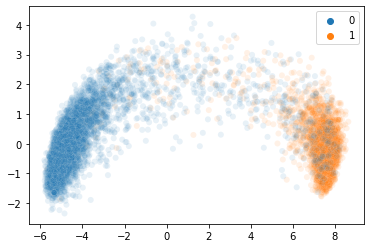

In [34]:
plot_representation(model, train)

Batches: 100%|██████████| 28/28 [00:00<00:00, 51.23it/s]


[0.72166127 0.7530651 ]


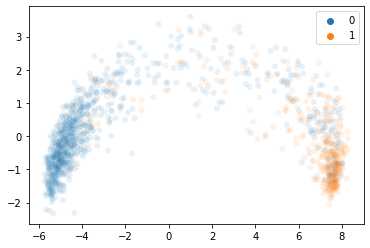

In [35]:
plot_representation(model, test)

### Classifier Trial, F1 = 0.8364505450385958
"/scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-2224"

In [32]:
model_checkpoint = "/scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/MarbertV2_OnlineContrastive_25K"
output_dir = "/scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K"
trainer = run_linearclassifier(model_checkpoint, output_dir, batch_size=64, epochs=100, es_patience = 10, my_classifier_dropout=0.3)
trainer.train()


Pre-Processed


100%|██████████| 2/2 [00:00<00:00, 306.16it/s]
Didn't find file /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/MarbertV2_OnlineContrastive_25K/added_tokens.json. We won't load it.
loading file /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/MarbertV2_OnlineContrastive_25K/vocab.txt
loading file /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/MarbertV2_OnlineContrastive_25K/tokenizer.json
loading file None
loading file /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/MarbertV2_OnlineContrastive_25K/special_tokens_map.json
loading file /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/MarbertV2_OnlineContrastive_25K/tokenizer_config.json
100%|██████████| 2/2 [00:00<00:00, 37.97ba/s]
loading configuration file /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/MarbertV2_OnlineContrastive_25K/config.json
Model config BertConfig {
  "_name_or_path": "/scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/MarbertV2_OnlineContrastive_2

{'eval_loss': 0.4310980439186096, 'eval_f1': 0.834701353006923, 'eval_recall': 0.8486211785150801, 'eval_precision': 0.8258398450544313, 'eval_runtime': 4.1532, 'eval_samples_per_second': 305.788, 'eval_steps_per_second': 76.567, 'epoch': 1.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-139/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-139/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-139/special_tokens_map.json
  2%|▏         | 277/13900 [00:15<07:18, 31.05it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 98%|█████████▊| 312/318 [00:04<00:00, 77.37it/s]
                                                   
  2%|▏         | 

{'eval_loss': 0.41626691818237305, 'eval_f1': 0.8327186512118019, 'eval_recall': 0.8482095900121189, 'eval_precision': 0.8234410177987341, 'eval_runtime': 4.2771, 'eval_samples_per_second': 296.928, 'eval_steps_per_second': 74.349, 'epoch': 2.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-278/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-278/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-278/special_tokens_map.json
  3%|▎         | 414/13900 [00:26<06:05, 36.87it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

100%|█████████▉| 317/318 [00:04<00:00, 74.68it/s]
                                                   
  3%|▎         | 

{'eval_loss': 0.41029438376426697, 'eval_f1': 0.8328276080318591, 'eval_recall': 0.8509335055907439, 'eval_precision': 0.8229997816484751, 'eval_runtime': 4.3074, 'eval_samples_per_second': 294.844, 'eval_steps_per_second': 73.827, 'epoch': 3.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-417/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-417/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-417/special_tokens_map.json
  4%|▎         | 507/13900 [00:35<07:41, 28.99it/s]  

{'loss': 0.1745, 'learning_rate': 0.0009640287769784173, 'epoch': 3.6}


  4%|▍         | 554/13900 [00:37<07:08, 31.16it/s]The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

100%|█████████▉| 317/318 [00:04<00:00, 68.95it/s]
                                                   
  4%|▍         | 556/13900 [00:41<07:08, 31.16it/s]A
                                                 Saving model checkpoint to /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-556
Configuration saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-556/config.json


{'eval_loss': 0.4291625916957855, 'eval_f1': 0.8359026872325533, 'eval_recall': 0.8484553998124986, 'eval_precision': 0.8275012155841923, 'eval_runtime': 4.3925, 'eval_samples_per_second': 289.126, 'eval_steps_per_second': 72.395, 'epoch': 4.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-556/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-556/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-556/special_tokens_map.json
  5%|▌         | 695/13900 [00:48<07:17, 30.18it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 98%|█████████▊| 312/318 [00:04<00:00, 67.22it/s]
                                                   
  5%|▌         | 

{'eval_loss': 0.4734719693660736, 'eval_f1': 0.8338583265012305, 'eval_recall': 0.8501074703313287, 'eval_precision': 0.8243694141012909, 'eval_runtime': 4.4674, 'eval_samples_per_second': 284.282, 'eval_steps_per_second': 71.182, 'epoch': 5.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-695/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-695/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-695/special_tokens_map.json
  6%|▌         | 833/13900 [00:58<07:29, 29.09it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

100%|█████████▉| 317/318 [00:03<00:00, 81.83it/s]
                                                   
  6%|▌         | 

{'eval_loss': 0.440296471118927, 'eval_f1': 0.8359026872325533, 'eval_recall': 0.8484553998124986, 'eval_precision': 0.8275012155841923, 'eval_runtime': 3.9925, 'eval_samples_per_second': 318.093, 'eval_steps_per_second': 79.648, 'epoch': 6.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-834/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-834/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-834/special_tokens_map.json
  7%|▋         | 971/13900 [01:09<06:46, 31.82it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 99%|█████████▉| 315/318 [00:03<00:00, 82.56it/s]
                                                   
  7%|▋         | 

{'eval_loss': 0.44814300537109375, 'eval_f1': 0.8347452934662236, 'eval_recall': 0.8465575194932888, 'eval_precision': 0.8266520108625371, 'eval_runtime': 3.8948, 'eval_samples_per_second': 326.079, 'eval_steps_per_second': 81.648, 'epoch': 7.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-973/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-973/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-973/special_tokens_map.json
  7%|▋         | 1004/13900 [01:15<11:33, 18.59it/s] 

{'loss': 0.1637, 'learning_rate': 0.0009280575539568345, 'epoch': 7.19}


  8%|▊         | 1110/13900 [01:19<06:24, 33.27it/s]The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 98%|█████████▊| 313/318 [00:03<00:00, 82.66it/s]
                                                    
  8%|▊         | 1112/13900 [01:23<06:24, 33.27it/s]
                                                 Saving model checkpoint to /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-1112
Configuration saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-1112/config.json


{'eval_loss': 0.458756685256958, 'eval_f1': 0.8357735024928519, 'eval_recall': 0.8525827178560812, 'eval_precision': 0.8261134507654768, 'eval_runtime': 3.9751, 'eval_samples_per_second': 319.486, 'eval_steps_per_second': 79.997, 'epoch': 8.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-1112/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-1112/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-1112/special_tokens_map.json
  9%|▉         | 1249/13900 [01:29<06:09, 34.26it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

100%|█████████▉| 317/318 [00:03<00:00, 81.30it/s]
                                                    
  9%|▉      

{'eval_loss': 0.4412232041358948, 'eval_f1': 0.8328988594031397, 'eval_recall': 0.8488698465689525, 'eval_precision': 0.8234977630769884, 'eval_runtime': 4.0586, 'eval_samples_per_second': 312.916, 'eval_steps_per_second': 78.352, 'epoch': 9.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-1251/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-1251/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-1251/special_tokens_map.json
 10%|▉         | 1389/13900 [01:39<06:20, 32.92it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 98%|█████████▊| 313/318 [00:03<00:00, 72.54it/s]
                                                    
 10%|█      

{'eval_loss': 0.4715392589569092, 'eval_f1': 0.835340006168779, 'eval_recall': 0.8533258637642055, 'eval_precision': 0.8254628556985488, 'eval_runtime': 4.1482, 'eval_samples_per_second': 306.159, 'eval_steps_per_second': 76.66, 'epoch': 10.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-1390/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-1390/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-1390/special_tokens_map.json
 11%|█         | 1503/13900 [01:49<09:06, 22.70it/s]  

{'loss': 0.166, 'learning_rate': 0.0008920863309352518, 'epoch': 10.79}


 11%|█         | 1528/13900 [01:50<06:40, 30.90it/s]The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

100%|██████████| 318/318 [00:04<00:00, 77.38it/s]
                                                    
 11%|█         | 1529/13900 [01:54<06:40, 30.90it/s]
                                                 Saving model checkpoint to /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-1529
Configuration saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-1529/config.json


{'eval_loss': 0.40560707449913025, 'eval_f1': 0.836203679311556, 'eval_recall': 0.8518395719479569, 'eval_precision': 0.8268127946986109, 'eval_runtime': 4.0741, 'eval_samples_per_second': 311.729, 'eval_steps_per_second': 78.055, 'epoch': 11.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-1529/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-1529/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-1529/special_tokens_map.json
 12%|█▏        | 1668/13900 [02:00<06:11, 32.95it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 99%|█████████▉| 315/318 [00:04<00:00, 79.84it/s]
                                                    
 12%|█▏     

{'eval_loss': 0.407856822013855, 'eval_f1': 0.8334997854997854, 'eval_recall': 0.8487869572176617, 'eval_precision': 0.824258826718111, 'eval_runtime': 4.141, 'eval_samples_per_second': 306.69, 'eval_steps_per_second': 76.793, 'epoch': 12.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-1668/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-1668/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-1668/special_tokens_map.json
 13%|█▎        | 1807/13900 [02:10<06:14, 32.31it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 98%|█████████▊| 313/318 [00:03<00:00, 77.63it/s]
                                                    
 13%|█▎     

{'eval_loss': 0.4600051939487457, 'eval_f1': 0.8290036913987879, 'eval_recall': 0.8459830105412389, 'eval_precision': 0.8194787919417033, 'eval_runtime': 4.0269, 'eval_samples_per_second': 315.376, 'eval_steps_per_second': 78.968, 'epoch': 13.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-1807/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-1807/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-1807/special_tokens_map.json
 14%|█▍        | 1944/13900 [02:21<06:10, 32.30it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 98%|█████████▊| 311/318 [00:03<00:00, 79.17it/s]
                                                    
 14%|█▍     

{'eval_loss': 0.4291624426841736, 'eval_f1': 0.8319381316204657, 'eval_recall': 0.8476322228065762, 'eval_precision': 0.8226263392584772, 'eval_runtime': 4.0663, 'eval_samples_per_second': 312.327, 'eval_steps_per_second': 78.205, 'epoch': 14.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-1946/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-1946/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-1946/special_tokens_map.json
 14%|█▍        | 2004/13900 [02:29<07:38, 25.93it/s]  

{'loss': 0.1631, 'learning_rate': 0.0008561151079136691, 'epoch': 14.39}


 15%|█▍        | 2084/13900 [02:31<06:06, 32.20it/s]The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 99%|█████████▊| 314/318 [00:03<00:00, 73.10it/s]
                                                    
 15%|█▌        | 2085/13900 [02:35<06:06, 32.20it/s]
                                                 Saving model checkpoint to /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-2085
Configuration saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-2085/config.json


{'eval_loss': 0.4293273985385895, 'eval_f1': 0.8317563277563278, 'eval_recall': 0.8469719662497428, 'eval_precision': 0.8225714733650609, 'eval_runtime': 4.0637, 'eval_samples_per_second': 312.526, 'eval_steps_per_second': 78.255, 'epoch': 15.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-2085/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-2085/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-2085/special_tokens_map.json
 16%|█▌        | 2222/13900 [02:41<05:47, 33.60it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 98%|█████████▊| 311/318 [00:03<00:00, 80.04it/s]
                                                    
 16%|█▌     

{'eval_loss': 0.45277681946754456, 'eval_f1': 0.8364505450385958, 'eval_recall': 0.8504361694829992, 'eval_precision': 0.827536231884058, 'eval_runtime': 4.0455, 'eval_samples_per_second': 313.926, 'eval_steps_per_second': 78.605, 'epoch': 16.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-2224/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-2224/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-2224/special_tokens_map.json
 17%|█▋        | 2362/13900 [02:52<06:00, 31.99it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 98%|█████████▊| 313/318 [00:03<00:00, 76.30it/s]
                                                    
 17%|█▋     

{'eval_loss': 0.47637805342674255, 'eval_f1': 0.8342117007978096, 'eval_recall': 0.8514279834449958, 'eval_precision': 0.8245066497047948, 'eval_runtime': 4.0863, 'eval_samples_per_second': 310.795, 'eval_steps_per_second': 77.821, 'epoch': 17.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-2363/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-2363/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-2363/special_tokens_map.json
 18%|█▊        | 2500/13900 [03:02<05:02, 37.68it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4


{'loss': 0.1601, 'learning_rate': 0.0008201438848920863, 'epoch': 17.99}



 99%|█████████▉| 316/318 [00:04<00:00, 79.24it/s]
                                                    
 18%|█▊        | 2502/13900 [03:06<05:02, 37.68it/s]
                                                 Saving model checkpoint to /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-2502
Configuration saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-2502/config.json


{'eval_loss': 0.4622097313404083, 'eval_f1': 0.833953013278856, 'eval_recall': 0.8528313859099536, 'eval_precision': 0.8239769673301419, 'eval_runtime': 4.1866, 'eval_samples_per_second': 303.347, 'eval_steps_per_second': 75.956, 'epoch': 18.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-2502/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-2502/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-2502/special_tokens_map.json
 19%|█▉        | 2641/13900 [03:13<05:37, 33.35it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 98%|█████████▊| 313/318 [00:03<00:00, 78.55it/s]
                                                    
 19%|█▉     

{'eval_loss': 0.4739675521850586, 'eval_f1': 0.8347452934662236, 'eval_recall': 0.8465575194932888, 'eval_precision': 0.8266520108625371, 'eval_runtime': 4.0685, 'eval_samples_per_second': 312.156, 'eval_steps_per_second': 78.162, 'epoch': 19.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-2641/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-2641/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-2641/special_tokens_map.json
 20%|█▉        | 2778/13900 [03:23<05:30, 33.67it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

100%|██████████| 318/318 [00:03<00:00, 82.84it/s]
                                                    
 20%|██     

{'eval_loss': 0.44059616327285767, 'eval_f1': 0.8351177848492886, 'eval_recall': 0.8478780326069558, 'eval_precision': 0.8266505636070853, 'eval_runtime': 3.9781, 'eval_samples_per_second': 319.25, 'eval_steps_per_second': 79.938, 'epoch': 20.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-2780/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-2780/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-2780/special_tokens_map.json
 21%|██        | 2917/13900 [03:33<05:31, 33.14it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 99%|█████████▉| 316/318 [00:03<00:00, 83.53it/s]
                                                    
 21%|██     

{'eval_loss': 0.4462210536003113, 'eval_f1': 0.8333185596557665, 'eval_recall': 0.8481267006608282, 'eval_precision': 0.8242136029323687, 'eval_runtime': 4.0593, 'eval_samples_per_second': 312.858, 'eval_steps_per_second': 78.338, 'epoch': 21.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-2919/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-2919/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-2919/special_tokens_map.json
 22%|██▏       | 3003/13900 [03:42<07:33, 24.05it/s]  

{'loss': 0.1601, 'learning_rate': 0.0007841726618705036, 'epoch': 21.58}


 22%|██▏       | 3057/13900 [03:43<05:37, 32.10it/s]The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 99%|█████████▉| 316/318 [00:03<00:00, 75.11it/s]
                                                    
 22%|██▏       | 3058/13900 [03:47<05:37, 32.10it/s]
                                                 Saving model checkpoint to /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-3058
Configuration saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-3058/config.json


{'eval_loss': 0.4475736916065216, 'eval_f1': 0.8342117007978096, 'eval_recall': 0.8514279834449958, 'eval_precision': 0.8245066497047948, 'eval_runtime': 3.9691, 'eval_samples_per_second': 319.976, 'eval_steps_per_second': 80.12, 'epoch': 22.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-3058/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-3058/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-3058/special_tokens_map.json
 23%|██▎       | 3195/13900 [03:54<05:38, 31.65it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

100%|██████████| 318/318 [00:04<00:00, 76.05it/s]
                                                    
 23%|██▎    

{'eval_loss': 0.43370383977890015, 'eval_f1': 0.836086618928479, 'eval_recall': 0.8491156563693321, 'eval_precision': 0.8275059056332099, 'eval_runtime': 4.1752, 'eval_samples_per_second': 304.18, 'eval_steps_per_second': 76.165, 'epoch': 23.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-3197/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-3197/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-3197/special_tokens_map.json
 24%|██▍       | 3333/13900 [04:04<04:59, 35.26it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 99%|█████████▉| 316/318 [00:03<00:00, 82.87it/s]
                                                    
 24%|██▍    

{'eval_loss': 0.46005964279174805, 'eval_f1': 0.8357174331549322, 'eval_recall': 0.847795143255665, 'eval_precision': 0.82750355949949, 'eval_runtime': 4.0872, 'eval_samples_per_second': 310.723, 'eval_steps_per_second': 77.803, 'epoch': 24.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-3336/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-3336/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-3336/special_tokens_map.json
 25%|██▍       | 3473/13900 [04:15<05:45, 30.22it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

100%|██████████| 318/318 [00:03<00:00, 84.51it/s]
                                                    
 25%|██▌    

{'eval_loss': 0.40320947766304016, 'eval_f1': 0.8338583265012305, 'eval_recall': 0.8501074703313287, 'eval_precision': 0.8243694141012909, 'eval_runtime': 3.9699, 'eval_samples_per_second': 319.909, 'eval_steps_per_second': 80.103, 'epoch': 25.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-3475/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-3475/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-3475/special_tokens_map.json
 25%|██▌       | 3506/13900 [04:21<08:39, 20.00it/s]  

{'loss': 0.1629, 'learning_rate': 0.0007482014388489208, 'epoch': 25.18}


 26%|██▌       | 3612/13900 [04:25<05:29, 31.19it/s]The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 98%|█████████▊| 312/318 [00:03<00:00, 76.07it/s]
                                                    
 26%|██▌       | 3614/13900 [04:29<05:29, 31.19it/s]
                                                 Saving model checkpoint to /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-3614
Configuration saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-3614/config.json


{'eval_loss': 0.44023898243904114, 'eval_f1': 0.8348165388828039, 'eval_recall': 0.851345094093705, 'eval_precision': 0.8252413055902461, 'eval_runtime': 4.1129, 'eval_samples_per_second': 308.784, 'eval_steps_per_second': 77.318, 'epoch': 26.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-3614/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-3614/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-3614/special_tokens_map.json


Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_25K/checkpoint-2224 (score: 0.8364505450385958).
 26%|██▌       | 3614/13900 [04:31<12:51, 13.33it/s]

{'train_runtime': 271.2011, 'train_samples_per_second': 3276.904, 'train_steps_per_second': 51.253, 'train_loss': 0.16418169767868473, 'epoch': 26.0}


TrainOutput(global_step=3614, training_loss=0.16418169767868473, metrics={'train_runtime': 271.2011, 'train_samples_per_second': 3276.904, 'train_steps_per_second': 51.253, 'train_loss': 0.16418169767868473, 'epoch': 26.0})

## Online Contrastive 1MILLION

In [5]:
distance_metric = losses.SiameseDistanceMetric.COSINE_DISTANCE
margin = 0.7

In [6]:
train_data = make_contranstive_data(data= train, size='1000K')
val_data = make_contranstive_data(data= test, size='100K')

  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/500000 [00:00<?, ?it/s]

Total Data Length 1000000
Ratio Between Negative and Positive Samples = 1.0


  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

Total Data Length 100000
Ratio Between Negative and Positive Samples = 1.0


In [ ]:
binary_evaluator = evaluation.BinaryClassificationEvaluator.from_input_examples(val_data)
train_dataloader = DataLoader(train_data, shuffle=True, batch_size=256)
train_loss = losses.OnlineContrastiveLoss(model=model, distance_metric=distance_metric, margin=margin)
model.fit(train_objectives=[(train_dataloader, train_loss)],
          evaluator = binary_evaluator, 
          epochs=10,
          warmup_steps=1000,
          output_path="./Checkpoints/SentenceBert/MarbertV2_OnlineContrastive_1M",
          save_best_model = True
          )

/home/ashapiro/.local/lib/python3.8/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Iteration:   2%|▏         | 136/7813 [02:01<1:56:58,  1.09it/s]

In [ ]:
from sentence_transformers import SentenceTransformer, LoggingHandler, losses, util
from sentence_transformers.datasets import SentenceLabelDataset
from torch.utils.data import DataLoader
from sentence_transformers.readers import InputExample
from sentence_transformers.evaluation import TripletEvaluator
from datetime import datetime

Batches: 100%|██████████| 179/179 [00:03<00:00, 57.82it/s]


[0.91581774 0.9317963 ]


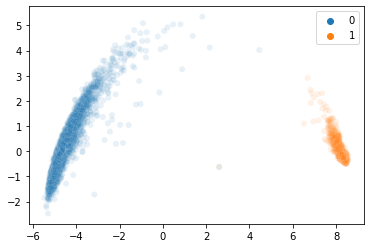

In [10]:
plot_representation(model, train)

Batches: 100%|██████████| 28/28 [00:00<00:00, 57.25it/s]


[0.7842664  0.87590796]


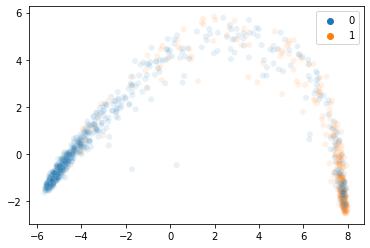

In [11]:
plot_representation(model, test)

### Classifier Trial, F1 = 0.8472710701152166
"/scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-1946"

In [28]:
model_checkpoint = "/scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/MarbertV2_OnlineContrastive_1M"
output_dir = "/scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M"
trainer = run_linearclassifier(model_checkpoint, output_dir, batch_size=64, epochs=100, es_patience = 10, my_classifier_dropout=0.3)
trainer.train()


Pre-Processed


100%|██████████| 2/2 [00:00<00:00, 331.23it/s]
Didn't find file /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/MarbertV2_OnlineContrastive_1M/added_tokens.json. We won't load it.
loading file /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/MarbertV2_OnlineContrastive_1M/vocab.txt
loading file /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/MarbertV2_OnlineContrastive_1M/tokenizer.json
loading file None
loading file /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/MarbertV2_OnlineContrastive_1M/special_tokens_map.json
loading file /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/MarbertV2_OnlineContrastive_1M/tokenizer_config.json
100%|██████████| 2/2 [00:00<00:00, 42.56ba/s]
loading configuration file /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/MarbertV2_OnlineContrastive_1M/config.json
Model config BertConfig {
  "_name_or_path": "/scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/MarbertV2_OnlineContrastive_1M",
  

{'eval_loss': 1.468583583831787, 'eval_f1': 0.8315184537827998, 'eval_recall': 0.8483753687147005, 'eval_precision': 0.8219538481044757, 'eval_runtime': 3.8609, 'eval_samples_per_second': 328.943, 'eval_steps_per_second': 82.365, 'epoch': 1.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-139/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-139/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-139/special_tokens_map.json
  2%|▏         | 276/13900 [00:15<06:56, 32.73it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

100%|█████████▉| 317/318 [00:03<00:00, 82.41it/s]
                                                   
  2%|▏         | 278

{'eval_loss': 0.9569410681724548, 'eval_f1': 0.842446696998082, 'eval_recall': 0.8516709349918825, 'eval_precision': 0.8354846977728334, 'eval_runtime': 3.9499, 'eval_samples_per_second': 321.528, 'eval_steps_per_second': 80.509, 'epoch': 2.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-278/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-278/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-278/special_tokens_map.json
  3%|▎         | 414/13900 [00:25<05:47, 38.86it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 99%|█████████▉| 316/318 [00:03<00:00, 77.86it/s]
                                                   
  3%|▎         | 417

{'eval_loss': 0.8027638792991638, 'eval_f1': 0.8441219184972817, 'eval_recall': 0.846634692337594, 'eval_precision': 0.8417882054533925, 'eval_runtime': 3.9863, 'eval_samples_per_second': 318.587, 'eval_steps_per_second': 79.772, 'epoch': 3.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-417/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-417/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-417/special_tokens_map.json
  4%|▎         | 502/13900 [00:34<09:16, 24.07it/s]  

{'loss': 0.0123, 'learning_rate': 0.0009640287769784173, 'epoch': 3.6}


  4%|▍         | 556/13900 [00:36<06:47, 32.71it/s]The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 99%|█████████▉| 315/318 [00:04<00:00, 80.56it/s]
                                                   
  4%|▍         | 556/13900 [00:40<06:47, 32.71it/s]A
                                                 Saving model checkpoint to /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-556
Configuration saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-556/config.json


{'eval_loss': 0.8972787261009216, 'eval_f1': 0.8429183158182065, 'eval_recall': 0.8447368120183842, 'eval_precision': 0.8411948084278181, 'eval_runtime': 4.2032, 'eval_samples_per_second': 302.154, 'eval_steps_per_second': 75.657, 'epoch': 4.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-556/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-556/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-556/special_tokens_map.json
  5%|▍         | 693/13900 [00:47<06:51, 32.13it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 98%|█████████▊| 312/318 [00:04<00:00, 75.57it/s]
                                                   
  5%|▌         | 695

{'eval_loss': 0.8656200170516968, 'eval_f1': 0.8431203837012173, 'eval_recall': 0.8453970685752179, 'eval_precision': 0.8409916926272066, 'eval_runtime': 4.4146, 'eval_samples_per_second': 287.683, 'eval_steps_per_second': 72.034, 'epoch': 5.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-695/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-695/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-695/special_tokens_map.json
  6%|▌         | 832/13900 [00:58<06:42, 32.45it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 98%|█████████▊| 311/318 [00:03<00:00, 80.01it/s]
                                                   
  6%|▌         | 834

{'eval_loss': 0.8386391997337341, 'eval_f1': 0.8434956553637343, 'eval_recall': 0.8425902636453022, 'eval_precision': 0.8444252873563218, 'eval_runtime': 4.1639, 'eval_samples_per_second': 305.001, 'eval_steps_per_second': 76.37, 'epoch': 6.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-834/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-834/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-834/special_tokens_map.json
  7%|▋         | 971/13900 [01:09<06:46, 31.78it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

100%|██████████| 318/318 [00:04<00:00, 70.78it/s]
                                                   
  7%|▋         | 973

{'eval_loss': 0.9414443969726562, 'eval_f1': 0.8363170717510788, 'eval_recall': 0.8477122539043742, 'eval_precision': 0.8283773861967694, 'eval_runtime': 4.3056, 'eval_samples_per_second': 294.964, 'eval_steps_per_second': 73.857, 'epoch': 7.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-973/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-973/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-973/special_tokens_map.json
  7%|▋         | 1004/13900 [01:15<12:33, 17.12it/s] 

{'loss': 0.0053, 'learning_rate': 0.0009280575539568345, 'epoch': 7.19}


  8%|▊         | 1111/13900 [01:19<06:48, 31.27it/s]The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 99%|█████████▉| 315/318 [00:04<00:00, 76.27it/s]
                                                    
  8%|▊         | 1112/13900 [01:24<06:48, 31.27it/s]
                                                 Saving model checkpoint to /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-1112
Configuration saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-1112/config.json


{'eval_loss': 1.0515625476837158, 'eval_f1': 0.8357174331549322, 'eval_recall': 0.847795143255665, 'eval_precision': 0.82750355949949, 'eval_runtime': 4.2388, 'eval_samples_per_second': 299.611, 'eval_steps_per_second': 75.021, 'epoch': 8.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-1112/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-1112/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-1112/special_tokens_map.json
  9%|▉         | 1251/13900 [01:30<06:24, 32.88it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 99%|█████████▉| 315/318 [00:04<00:00, 78.44it/s]
                                                    
  9%|▉         

{'eval_loss': 0.9260236620903015, 'eval_f1': 0.8444563109446069, 'eval_recall': 0.8520825234948437, 'eval_precision': 0.8383898181698308, 'eval_runtime': 4.2853, 'eval_samples_per_second': 296.361, 'eval_steps_per_second': 74.207, 'epoch': 9.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-1251/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-1251/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-1251/special_tokens_map.json
 10%|▉         | 1389/13900 [01:41<06:32, 31.86it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

100%|█████████▉| 317/318 [00:04<00:00, 76.61it/s]
                                                    
 10%|█         

{'eval_loss': 1.036110758781433, 'eval_f1': 0.8444563109446069, 'eval_recall': 0.8520825234948437, 'eval_precision': 0.8383898181698308, 'eval_runtime': 4.2224, 'eval_samples_per_second': 300.78, 'eval_steps_per_second': 75.313, 'epoch': 10.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-1390/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-1390/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-1390/special_tokens_map.json
 11%|█         | 1504/13900 [01:51<08:40, 23.80it/s]  

{'loss': 0.0042, 'learning_rate': 0.0008920863309352518, 'epoch': 10.79}


 11%|█         | 1529/13900 [01:52<07:03, 29.20it/s]The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 99%|█████████▉| 315/318 [00:04<00:00, 77.25it/s]
                                                    
 11%|█         | 1529/13900 [01:56<07:03, 29.20it/s]
                                                 Saving model checkpoint to /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-1529
Configuration saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-1529/config.json


{'eval_loss': 1.1088063716888428, 'eval_f1': 0.8408632091890009, 'eval_recall': 0.8505162005807971, 'eval_precision': 0.8336916060777569, 'eval_runtime': 4.1383, 'eval_samples_per_second': 306.893, 'eval_steps_per_second': 76.844, 'epoch': 11.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-1529/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-1529/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-1529/special_tokens_map.json
 12%|█▏        | 1666/13900 [02:02<06:12, 32.87it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 98%|█████████▊| 313/318 [00:03<00:00, 81.49it/s]
                                                    
 12%|█▏        

{'eval_loss': 1.0465389490127563, 'eval_f1': 0.8431203837012173, 'eval_recall': 0.8453970685752179, 'eval_precision': 0.8409916926272066, 'eval_runtime': 4.0332, 'eval_samples_per_second': 314.885, 'eval_steps_per_second': 78.845, 'epoch': 12.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-1668/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-1668/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-1668/special_tokens_map.json
 13%|█▎        | 1806/13900 [02:13<06:12, 32.45it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

100%|█████████▉| 317/318 [00:03<00:00, 80.67it/s]
                                                    
 13%|█▎        

{'eval_loss': 1.5374608039855957, 'eval_f1': 0.8427206740401008, 'eval_recall': 0.8461402144833421, 'eval_precision': 0.8396313196043402, 'eval_runtime': 4.0003, 'eval_samples_per_second': 317.472, 'eval_steps_per_second': 79.493, 'epoch': 13.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-1807/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-1807/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-1807/special_tokens_map.json
 14%|█▍        | 1945/13900 [02:23<06:03, 32.88it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 98%|█████████▊| 311/318 [00:03<00:00, 80.82it/s]
                                                    
 14%|█▍        

{'eval_loss': 1.0916038751602173, 'eval_f1': 0.8472710701152166, 'eval_recall': 0.8530714792033476, 'eval_precision': 0.8423801723445006, 'eval_runtime': 4.1331, 'eval_samples_per_second': 307.277, 'eval_steps_per_second': 76.94, 'epoch': 14.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-1946/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-1946/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-1946/special_tokens_map.json
 14%|█▍        | 2004/13900 [02:31<07:30, 26.38it/s]  

{'loss': 0.0029, 'learning_rate': 0.0008561151079136691, 'epoch': 14.39}


 15%|█▍        | 2084/13900 [02:34<06:09, 31.94it/s]The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

100%|██████████| 318/318 [00:04<00:00, 69.30it/s]
                                                    
 15%|█▌        | 2085/13900 [02:38<06:09, 31.94it/s]
                                                 Saving model checkpoint to /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-2085
Configuration saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-2085/config.json


{'eval_loss': 1.3033033609390259, 'eval_f1': 0.8435170802200205, 'eval_recall': 0.8446539226670935, 'eval_precision': 0.8424175562049019, 'eval_runtime': 4.2943, 'eval_samples_per_second': 295.743, 'eval_steps_per_second': 74.052, 'epoch': 15.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-2085/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-2085/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-2085/special_tokens_map.json
 16%|█▌        | 2223/13900 [02:45<06:13, 31.25it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 99%|█████████▉| 315/318 [00:04<00:00, 66.40it/s]
                                                    
 16%|█▌        

{'eval_loss': 1.4314175844192505, 'eval_f1': 0.8454378352064327, 'eval_recall': 0.8533201472572199, 'eval_precision': 0.8392112311204777, 'eval_runtime': 4.369, 'eval_samples_per_second': 290.686, 'eval_steps_per_second': 72.786, 'epoch': 16.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-2224/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-2224/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-2224/special_tokens_map.json
 17%|█▋        | 2361/13900 [02:56<06:12, 30.97it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 99%|█████████▊| 314/318 [00:04<00:00, 73.69it/s]
                                                    
 17%|█▋        

{'eval_loss': 1.2445812225341797, 'eval_f1': 0.842520968271075, 'eval_recall': 0.8454799579265087, 'eval_precision': 0.8398106836922021, 'eval_runtime': 4.446, 'eval_samples_per_second': 285.65, 'eval_steps_per_second': 71.525, 'epoch': 17.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-2363/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-2363/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-2363/special_tokens_map.json
 18%|█▊        | 2501/13900 [03:07<06:11, 30.67it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4


{'loss': 0.0046, 'learning_rate': 0.0008201438848920863, 'epoch': 17.99}



 98%|█████████▊| 312/318 [00:04<00:00, 68.80it/s]
                                                    
 18%|█▊        | 2502/13900 [03:11<06:11, 30.67it/s]
                                                 Saving model checkpoint to /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-2502
Configuration saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-2502/config.json


{'eval_loss': 1.2906298637390137, 'eval_f1': 0.8466597030347957, 'eval_recall': 0.8531543685546383, 'eval_precision': 0.8412998320516221, 'eval_runtime': 4.3872, 'eval_samples_per_second': 289.482, 'eval_steps_per_second': 72.484, 'epoch': 18.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-2502/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-2502/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-2502/special_tokens_map.json
 19%|█▉        | 2638/13900 [03:19<05:38, 33.31it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 98%|█████████▊| 313/318 [00:04<00:00, 73.85it/s]
                                                    
 19%|█▉        

{'eval_loss': 1.1232167482376099, 'eval_f1': 0.8450650505231807, 'eval_recall': 0.851999634143553, 'eval_precision': 0.839426278305735, 'eval_runtime': 4.4631, 'eval_samples_per_second': 284.555, 'eval_steps_per_second': 71.251, 'epoch': 19.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-2641/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-2641/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-2641/special_tokens_map.json
 20%|█▉        | 2778/13900 [03:30<05:47, 32.00it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 98%|█████████▊| 313/318 [00:04<00:00, 67.95it/s]
                                                    
 20%|██        

{'eval_loss': 1.043372392654419, 'eval_f1': 0.8440330355223972, 'eval_recall': 0.852825669402968, 'eval_precision': 0.8372926093514328, 'eval_runtime': 4.4866, 'eval_samples_per_second': 283.065, 'eval_steps_per_second': 70.878, 'epoch': 20.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-2780/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-2780/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-2780/special_tokens_map.json
 21%|██        | 2919/13900 [03:41<05:55, 30.85it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

100%|██████████| 318/318 [00:04<00:00, 82.13it/s]
                                                    
 21%|██        

{'eval_loss': 1.4975274801254272, 'eval_f1': 0.8423179376044065, 'eval_recall': 0.8468833603914665, 'eval_precision': 0.8383346714840091, 'eval_runtime': 4.1333, 'eval_samples_per_second': 307.259, 'eval_steps_per_second': 76.936, 'epoch': 21.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-2919/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-2919/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-2919/special_tokens_map.json
 22%|██▏       | 3006/13900 [03:50<06:54, 26.31it/s]  

{'loss': 0.0032, 'learning_rate': 0.0007841726618705036, 'epoch': 21.58}


 22%|██▏       | 3056/13900 [03:51<05:39, 31.97it/s]The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

100%|█████████▉| 317/318 [00:04<00:00, 74.33it/s]
                                                    
 22%|██▏       | 3058/13900 [03:56<05:39, 31.97it/s]
                                                 Saving model checkpoint to /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-3058
Configuration saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-3058/config.json


{'eval_loss': 1.112901210784912, 'eval_f1': 0.836871850967913, 'eval_recall': 0.8496930235748748, 'eval_precision': 0.8283548040794417, 'eval_runtime': 4.4045, 'eval_samples_per_second': 288.344, 'eval_steps_per_second': 72.199, 'epoch': 22.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-3058/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-3058/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-3058/special_tokens_map.json
 23%|██▎       | 3195/13900 [04:02<05:45, 30.96it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 99%|█████████▉| 315/318 [00:04<00:00, 70.44it/s]
                                                    
 23%|██▎       

{'eval_loss': 0.981441855430603, 'eval_f1': 0.8437201031386147, 'eval_recall': 0.845314179223927, 'eval_precision': 0.8421989582182643, 'eval_runtime': 4.4603, 'eval_samples_per_second': 284.736, 'eval_steps_per_second': 71.296, 'epoch': 23.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-3197/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-3197/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-3197/special_tokens_map.json
 24%|██▍       | 3335/13900 [04:13<05:40, 30.99it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 99%|█████████▉| 315/318 [00:04<00:00, 75.30it/s]
                                                    
 24%|██▍       

{'eval_loss': 1.1716073751449585, 'eval_f1': 0.8390489058358883, 'eval_recall': 0.8507648686346694, 'eval_precision': 0.8309377738825592, 'eval_runtime': 4.4761, 'eval_samples_per_second': 283.732, 'eval_steps_per_second': 71.045, 'epoch': 24.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-3336/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-3336/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-3336/special_tokens_map.json


Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/MarbertV2_OnlineContrastive_1M/checkpoint-1946 (score: 0.8472710701152166).
 24%|██▍       | 3336/13900 [04:19<13:43, 12.83it/s]

{'train_runtime': 260.0782, 'train_samples_per_second': 3417.049, 'train_steps_per_second': 53.445, 'train_loss': 0.005278131837467496, 'epoch': 24.0}


TrainOutput(global_step=3336, training_loss=0.005278131837467496, metrics={'train_runtime': 260.0782, 'train_samples_per_second': 3417.049, 'train_steps_per_second': 53.445, 'train_loss': 0.005278131837467496, 'epoch': 24.0})

## Batch All Triplet Loss

In [1]:
%cd /scratch/mt/ashapiro/Hate_Speech/
%load_ext autoreload
%autoreload 2

/scratch/mt/ashapiro/Hate_Speech


In [6]:
train, test = getData(sub_task="A", return_type="pandas", pre_proccessed=True)

In [ ]:
from contrastive_utils import *
from sentence_transformers import losses
train_loss = losses.BatchAllTripletLoss
train, test, model  = run_batch_loss_expirement(
                          loss = train_loss, 
                          batch_size = 128,
                          epochs = 10,
                          expirement_name = "BatchAllTripletLoss"
)

Batches: 100%|██████████| 179/179 [00:03<00:00, 56.77it/s]


[0.8563827  0.86897266]


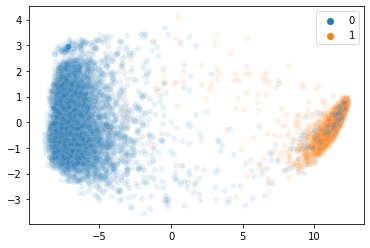

In [7]:
plot_representation(model, train)

Batches: 100%|██████████| 28/28 [00:00<00:00, 52.33it/s]


[0.79951525 0.8201932 ]


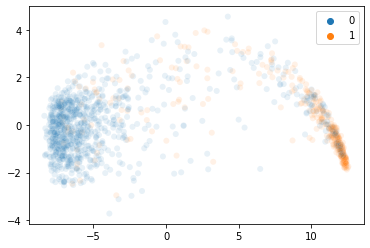

In [8]:
plot_representation(model, test)

### Classifier Trial, F1 = 0.8476439426944229
"/scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-1946"

In [30]:
model_checkpoint = "/scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/BatchAllTripletLoss"
output_dir = "/scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss"
trainer = run_linearclassifier(model_checkpoint, output_dir, batch_size=64, epochs=100, es_patience = 10, my_classifier_dropout=0.3)
trainer.train()


Pre-Processed


100%|██████████| 2/2 [00:00<00:00, 326.54it/s]
Didn't find file /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/BatchAllTripletLoss/added_tokens.json. We won't load it.
loading file /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/BatchAllTripletLoss/vocab.txt
loading file /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/BatchAllTripletLoss/tokenizer.json
loading file None
loading file /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/BatchAllTripletLoss/special_tokens_map.json
loading file /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/BatchAllTripletLoss/tokenizer_config.json
100%|██████████| 2/2 [00:00<00:00, 37.24ba/s]
loading configuration file /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/BatchAllTripletLoss/config.json
Model config BertConfig {
  "_name_or_path": "/scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/BatchAllTripletLoss",
  "architectures": [
    "BertModel"
  ],
  "attention_probs_dropout_prob": 0.1

{'eval_loss': 0.43543899059295654, 'eval_f1': 0.8437885464391864, 'eval_recall': 0.8542290718679257, 'eval_precision': 0.8361970978951737, 'eval_runtime': 4.3659, 'eval_samples_per_second': 290.889, 'eval_steps_per_second': 72.837, 'epoch': 1.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-139/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-139/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-139/special_tokens_map.json
  2%|▏         | 276/13900 [00:15<08:07, 27.96it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 99%|█████████▉| 315/318 [00:04<00:00, 76.82it/s]
                                                   
  2%|▏         | 278/13900 [00:20<08:07, 27.96it/s]A


{'eval_loss': 0.49559730291366577, 'eval_f1': 0.8450650505231807, 'eval_recall': 0.851999634143553, 'eval_precision': 0.839426278305735, 'eval_runtime': 4.207, 'eval_samples_per_second': 301.881, 'eval_steps_per_second': 75.589, 'epoch': 2.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-278/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-278/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-278/special_tokens_map.json
  3%|▎         | 417/13900 [00:26<07:29, 30.03it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 99%|█████████▊| 314/318 [00:04<00:00, 76.81it/s]
                                                   
  3%|▎         | 417/13900 [00:30<07:29, 30.03it/s]A


{'eval_loss': 0.42289385199546814, 'eval_f1': 0.8432841890349413, 'eval_recall': 0.8501846431756339, 'eval_precision': 0.8376761184486141, 'eval_runtime': 4.283, 'eval_samples_per_second': 296.524, 'eval_steps_per_second': 74.248, 'epoch': 3.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-417/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-417/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-417/special_tokens_map.json
  4%|▎         | 503/13900 [00:35<10:11, 21.91it/s]  

{'loss': 0.1117, 'learning_rate': 0.0009640287769784173, 'epoch': 3.6}


  4%|▍         | 554/13900 [00:37<07:13, 30.79it/s]The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 99%|█████████▊| 314/318 [00:04<00:00, 74.64it/s]
                                                   
  4%|▍         | 556/13900 [00:41<07:13, 30.79it/s]A
                                                 Saving model checkpoint to /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-556
Configuration saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-556/config.json


{'eval_loss': 0.4403059482574463, 'eval_f1': 0.8422981161222973, 'eval_recall': 0.8489470194132577, 'eval_precision': 0.8368568598397996, 'eval_runtime': 4.3568, 'eval_samples_per_second': 291.496, 'eval_steps_per_second': 72.989, 'epoch': 4.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-556/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-556/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-556/special_tokens_map.json
  5%|▌         | 695/13900 [00:47<06:44, 32.62it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

100%|██████████| 318/318 [00:04<00:00, 79.20it/s]
                                                   
  5%|▌         | 695/13900 [00:52<06:44, 32.62it/s]A


{'eval_loss': 0.46098941564559937, 'eval_f1': 0.8444563109446069, 'eval_recall': 0.8520825234948437, 'eval_precision': 0.8383898181698308, 'eval_runtime': 4.2002, 'eval_samples_per_second': 302.365, 'eval_steps_per_second': 75.71, 'epoch': 5.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-695/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-695/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-695/special_tokens_map.json
  6%|▌         | 832/13900 [00:58<07:00, 31.09it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 99%|█████████▊| 314/318 [00:03<00:00, 81.93it/s]
                                                   
  6%|▌         | 834/13900 [01:02<07:00, 31.09it/s]A


{'eval_loss': 0.4656720459461212, 'eval_f1': 0.8438899327444818, 'eval_recall': 0.8501017538243432, 'eval_precision': 0.8387305072606046, 'eval_runtime': 4.0507, 'eval_samples_per_second': 313.529, 'eval_steps_per_second': 78.506, 'epoch': 6.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-834/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-834/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-834/special_tokens_map.json
  7%|▋         | 972/13900 [01:08<06:59, 30.78it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 99%|█████████▉| 316/318 [00:04<00:00, 74.10it/s]
                                                   
  7%|▋         | 973/13900 [01:12<06:59, 30.78it/s]A


{'eval_loss': 0.5119940042495728, 'eval_f1': 0.8444563109446069, 'eval_recall': 0.8520825234948437, 'eval_precision': 0.8383898181698308, 'eval_runtime': 4.1967, 'eval_samples_per_second': 302.621, 'eval_steps_per_second': 75.774, 'epoch': 7.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-973/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-973/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-973/special_tokens_map.json
  7%|▋         | 1005/13900 [01:15<11:37, 18.49it/s] 

{'loss': 0.1037, 'learning_rate': 0.0009280575539568345, 'epoch': 7.19}


  8%|▊         | 1111/13900 [01:19<06:46, 31.44it/s]The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 99%|█████████▉| 316/318 [00:04<00:00, 76.44it/s]
                                                    
  8%|▊         | 1112/13900 [01:23<06:46, 31.44it/s]
                                                 Saving model checkpoint to /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-1112
Configuration saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-1112/config.json


{'eval_loss': 0.5000167489051819, 'eval_f1': 0.8440330355223972, 'eval_recall': 0.852825669402968, 'eval_precision': 0.8372926093514328, 'eval_runtime': 4.2818, 'eval_samples_per_second': 296.601, 'eval_steps_per_second': 74.267, 'epoch': 8.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-1112/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-1112/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-1112/special_tokens_map.json
  9%|▉         | 1250/13900 [01:29<06:25, 32.79it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

100%|█████████▉| 317/318 [00:04<00:00, 75.17it/s]
                                                    
  9%|▉         | 1251/13900 [01:33<06:25, 32.79i

{'eval_loss': 0.49653926491737366, 'eval_f1': 0.8459872206610464, 'eval_recall': 0.8553009169277205, 'eval_precision': 0.8389476037781123, 'eval_runtime': 4.208, 'eval_samples_per_second': 301.808, 'eval_steps_per_second': 75.571, 'epoch': 9.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-1251/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-1251/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-1251/special_tokens_map.json
 10%|█         | 1390/13900 [01:40<06:29, 32.09it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

100%|██████████| 318/318 [00:04<00:00, 78.13it/s]
                                                    
 10%|█         | 1390/13900 [01:44<06:29, 32.09i

{'eval_loss': 0.4665699303150177, 'eval_f1': 0.8438478047035678, 'eval_recall': 0.8521654128461345, 'eval_precision': 0.8373767798466594, 'eval_runtime': 4.1733, 'eval_samples_per_second': 304.318, 'eval_steps_per_second': 76.199, 'epoch': 10.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-1390/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-1390/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-1390/special_tokens_map.json
 11%|█         | 1503/13900 [01:50<09:02, 22.87it/s]  

{'loss': 0.0996, 'learning_rate': 0.0008920863309352518, 'epoch': 10.79}


 11%|█         | 1528/13900 [01:50<06:41, 30.80it/s]The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

100%|█████████▉| 317/318 [00:04<00:00, 75.74it/s]
                                                    
 11%|█         | 1529/13900 [01:55<06:41, 30.80it/s]
                                                 Saving model checkpoint to /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-1529
Configuration saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-1529/config.json


{'eval_loss': 0.43351849913597107, 'eval_f1': 0.8440800583130059, 'eval_recall': 0.8507620103811766, 'eval_precision': 0.8386089658159985, 'eval_runtime': 4.1434, 'eval_samples_per_second': 306.511, 'eval_steps_per_second': 76.748, 'epoch': 11.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-1529/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-1529/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-1529/special_tokens_map.json
 12%|█▏        | 1668/13900 [02:01<07:09, 28.47it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

100%|██████████| 318/318 [00:04<00:00, 79.85it/s]
                                                    
 12%|█▏        | 1668/13900 [02:05<07:09, 28.47i

{'eval_loss': 0.425734281539917, 'eval_f1': 0.84684591201142, 'eval_recall': 0.8538146251114719, 'eval_precision': 0.8411764381628558, 'eval_runtime': 4.2087, 'eval_samples_per_second': 301.755, 'eval_steps_per_second': 75.558, 'epoch': 12.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-1668/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-1668/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-1668/special_tokens_map.json
 13%|█▎        | 1806/13900 [02:12<06:27, 31.21it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 99%|█████████▉| 315/318 [00:04<00:00, 72.25it/s]
                                                    
 13%|█▎        | 1807/13900 [02:16<06:27, 31.21i

{'eval_loss': 0.5571795105934143, 'eval_f1': 0.8456740477988305, 'eval_recall': 0.8519167447922621, 'eval_precision': 0.8404865476246443, 'eval_runtime': 4.1597, 'eval_samples_per_second': 305.312, 'eval_steps_per_second': 76.448, 'epoch': 13.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-1807/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-1807/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-1807/special_tokens_map.json
 14%|█▍        | 1945/13900 [02:22<06:01, 33.05it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 99%|█████████▉| 315/318 [00:04<00:00, 74.16it/s]
                                                    
 14%|█▍        | 1946/13900 [02:26<06:01, 33.05i

{'eval_loss': 0.44288089871406555, 'eval_f1': 0.8476439426944229, 'eval_recall': 0.8543919923170146, 'eval_precision': 0.8421131777683964, 'eval_runtime': 4.2205, 'eval_samples_per_second': 300.915, 'eval_steps_per_second': 75.347, 'epoch': 14.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-1946/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-1946/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-1946/special_tokens_map.json
 14%|█▍        | 2005/13900 [02:30<06:45, 29.31it/s]  

{'loss': 0.0975, 'learning_rate': 0.0008561151079136691, 'epoch': 14.39}


 15%|█▍        | 2084/13900 [02:33<06:13, 31.64it/s]The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 98%|█████████▊| 312/318 [00:04<00:00, 71.77it/s]
                                                    
 15%|█▌        | 2085/13900 [02:38<06:13, 31.64it/s]
                                                 Saving model checkpoint to /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-2085
Configuration saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-2085/config.json


{'eval_loss': 0.43576082587242126, 'eval_f1': 0.8434733893557422, 'eval_recall': 0.8508448997324675, 'eval_precision': 0.8375684773282291, 'eval_runtime': 4.4911, 'eval_samples_per_second': 282.784, 'eval_steps_per_second': 70.807, 'epoch': 15.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-2085/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-2085/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-2085/special_tokens_map.json
 16%|█▌        | 2224/13900 [02:44<06:16, 30.97it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

100%|█████████▉| 317/318 [00:04<00:00, 78.59it/s]
                                                    
 16%|█▌        | 2224/13900 [02:48<06:16, 30.97i

{'eval_loss': 0.43050307035446167, 'eval_f1': 0.8448272852629557, 'eval_recall': 0.8534030366085107, 'eval_precision': 0.8382021887967088, 'eval_runtime': 4.1414, 'eval_samples_per_second': 306.658, 'eval_steps_per_second': 76.785, 'epoch': 16.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-2224/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-2224/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-2224/special_tokens_map.json
 17%|█▋        | 2361/13900 [02:54<05:53, 32.67it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 99%|█████████▊| 314/318 [00:03<00:00, 72.74it/s]
                                                    
 17%|█▋        | 2363/13900 [02:58<05:53, 32.67i

{'eval_loss': 0.44497719407081604, 'eval_f1': 0.8442169588295643, 'eval_recall': 0.8534859259598016, 'eval_precision': 0.8372161507754728, 'eval_runtime': 4.0109, 'eval_samples_per_second': 316.635, 'eval_steps_per_second': 79.283, 'epoch': 17.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-2363/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-2363/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-2363/special_tokens_map.json
 18%|█▊        | 2500/13900 [03:04<06:01, 31.51it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4


{'loss': 0.0984, 'learning_rate': 0.0008201438848920863, 'epoch': 17.99}



100%|█████████▉| 317/318 [00:03<00:00, 81.08it/s]
                                                    
 18%|█▊        | 2502/13900 [03:08<06:01, 31.51it/s]
                                                 Saving model checkpoint to /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-2502
Configuration saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-2502/config.json


{'eval_loss': 0.5384873151779175, 'eval_f1': 0.8454378352064327, 'eval_recall': 0.8533201472572199, 'eval_precision': 0.8392112311204777, 'eval_runtime': 3.9242, 'eval_samples_per_second': 323.631, 'eval_steps_per_second': 81.035, 'epoch': 18.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-2502/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-2502/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-2502/special_tokens_map.json
 19%|█▉        | 2641/13900 [03:15<05:37, 33.40it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 99%|█████████▉| 316/318 [00:03<00:00, 81.25it/s]
                                                    
 19%|█▉        | 2641/13900 [03:19<05:37, 33.40i

{'eval_loss': 0.5064255595207214, 'eval_f1': 0.8442169588295643, 'eval_recall': 0.8534859259598016, 'eval_precision': 0.8372161507754728, 'eval_runtime': 3.9374, 'eval_samples_per_second': 322.546, 'eval_steps_per_second': 80.763, 'epoch': 19.0}


Configuration saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-2641/config.json
Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-2641/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-2641/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-2641/special_tokens_map.json
 20%|█▉        | 2779/13900 [03:25<05:43, 32.39it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 98%|█████

{'eval_loss': 0.5142036080360413, 'eval_f1': 0.8462339531052399, 'eval_recall': 0.8538975144627626, 'eval_precision': 0.8401342230255946, 'eval_runtime': 4.1988, 'eval_samples_per_second': 302.47, 'eval_steps_per_second': 75.737, 'epoch': 20.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-2780/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-2780/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-2780/special_tokens_map.json
 21%|██        | 2919/13900 [03:36<05:46, 31.71it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 99%|█████████▊| 314/318 [00:04<00:00, 79.22it/s]
                                                    
 21%|██        | 2919/13900 [03:40<05:46, 31.71i

{'eval_loss': 0.43474218249320984, 'eval_f1': 0.8443995823181344, 'eval_recall': 0.854146182516635, 'eval_precision': 0.8371473507771343, 'eval_runtime': 4.1584, 'eval_samples_per_second': 305.407, 'eval_steps_per_second': 76.472, 'epoch': 21.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-2919/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-2919/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-2919/special_tokens_map.json
 22%|██▏       | 3005/13900 [03:44<06:54, 26.27it/s]  

{'loss': 0.096, 'learning_rate': 0.0007841726618705036, 'epoch': 21.58}


 22%|██▏       | 3055/13900 [03:46<04:48, 37.63it/s]The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

100%|█████████▉| 317/318 [00:04<00:00, 74.77it/s]
                                                    
 22%|██▏       | 3058/13900 [03:50<04:48, 37.63it/s]
                                                 Saving model checkpoint to /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-3058
Configuration saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-3058/config.json


{'eval_loss': 0.4771570861339569, 'eval_f1': 0.8451930437520331, 'eval_recall': 0.8547235497221777, 'eval_precision': 0.8380456247871979, 'eval_runtime': 4.1582, 'eval_samples_per_second': 305.424, 'eval_steps_per_second': 76.476, 'epoch': 22.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-3058/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-3058/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-3058/special_tokens_map.json
 23%|██▎       | 3195/13900 [03:56<05:51, 30.46it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

100%|██████████| 318/318 [00:04<00:00, 77.03it/s]
                                                    
 23%|██▎       | 3197/13900 [04:01<05:51, 30.46i

{'eval_loss': 0.478125661611557, 'eval_f1': 0.8442169588295643, 'eval_recall': 0.8534859259598016, 'eval_precision': 0.8372161507754728, 'eval_runtime': 4.1553, 'eval_samples_per_second': 305.635, 'eval_steps_per_second': 76.529, 'epoch': 23.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-3197/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-3197/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-3197/special_tokens_map.json
 24%|██▍       | 3336/13900 [04:07<05:30, 31.99it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

100%|█████████▉| 317/318 [00:04<00:00, 79.74it/s]
                                                    
 24%|██▍       | 3336/13900 [04:11<05:30, 31.99i

{'eval_loss': 0.5137491822242737, 'eval_f1': 0.8444563109446069, 'eval_recall': 0.8520825234948437, 'eval_precision': 0.8383898181698308, 'eval_runtime': 4.1683, 'eval_samples_per_second': 304.679, 'eval_steps_per_second': 76.29, 'epoch': 24.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-3336/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-3336/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-3336/special_tokens_map.json


Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLoss/checkpoint-1946 (score: 0.8476439426944229).
 24%|██▍       | 3336/13900 [04:13<13:22, 13.17it/s]

{'train_runtime': 253.8528, 'train_samples_per_second': 3500.848, 'train_steps_per_second': 54.756, 'train_loss': 0.10102240587595841, 'epoch': 24.0}


TrainOutput(global_step=3336, training_loss=0.10102240587595841, metrics={'train_runtime': 253.8528, 'train_samples_per_second': 3500.848, 'train_steps_per_second': 54.756, 'train_loss': 0.10102240587595841, 'epoch': 24.0})

## BatchHardTripletLoss -BAD-

In [ ]:
%cd /scratch/mt/ashapiro/Hate_Speech/
%load_ext autoreload
%autoreload 2
from contrastive_utils import *
from sentence_transformers import losses
train_loss = losses.BatchHardSoftMarginTripletLoss
train, test, model  = run_batch_loss_expirement(
                          loss = train_loss, 
                          batch_size = 128,
                          epochs = 10,
                          expirement_name = "BatchHardTripletLoss"
)

/scratch/mt/ashapiro/Hate_Speech
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


  0%|          | 0/8887 [00:00<?, ?it/s]

  0%|          | 0/1270 [00:00<?, ?it/s]

Some weights of the model checkpoint at /scratch/mt/ashapiro/Hate_Speech/Models/Marbertv2 were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/home/ashapiro/.local/lib/python3.8/site-packages/transformers/optimization.py:306: FutureW

## BatchHardSoftMarginTripletLoss --BAD--

In [2]:
%cd /scratch/mt/ashapiro/Hate_Speech/
%load_ext autoreload
%autoreload 2
from contrastive_utils import *
from sentence_transformers import losses
train_loss = losses.BatchHardSoftMarginTripletLoss
train, test, model  = run_batch_loss_expirement(
                          loss = train_loss, 
                          batch_size = 128,
                          epochs = 10,
                          expirement_name = "BatchHardSoftMarginTripletLoss"
)

/scratch/mt/ashapiro/Hate_Speech


  0%|          | 0/8887 [00:00<?, ?it/s]

  0%|          | 0/1270 [00:00<?, ?it/s]

Some weights of the model checkpoint at /scratch/mt/ashapiro/Hate_Speech/Models/Marbertv2 were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/home/ashapiro/.local/lib/python3.8/site-packages/transformers/optimization.py:306: FutureW

KeyboardInterrupt: 

## BatchSemiHardTripletLoss

In [10]:
import os 
os.getpid()
torch.cuda.empty_cache()

In [12]:
%cd /scratch/mt/ashapiro/Hate_Speech/
%load_ext autoreload
%autoreload 2
from contrastive_utils import *
from sentence_transformers import losses
train_loss = losses.BatchHardSoftMarginTripletLoss
train, test, model  = run_batch_loss_expirement(
                          loss = train_loss, 
                          batch_size = 128,
                          epochs = 10,
                          expirement_name = "BatchSemiHardTripletLoss"
)

/scratch/mt/ashapiro/Hate_Speech
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


  0%|          | 0/8887 [00:00<?, ?it/s]

  0%|          | 0/1270 [00:00<?, ?it/s]

Some weights of the model checkpoint at /scratch/mt/ashapiro/Hate_Speech/Models/Marbertv2 were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/home/ashapiro/.local/lib/python3.8/site-packages/transformers/optimization.py:306: FutureW

In [ ]:
plot_representation(model, train)

Batches: 100%|██████████| 28/28 [00:00<00:00, 55.50it/s]


[0.08882292 0.10469703]


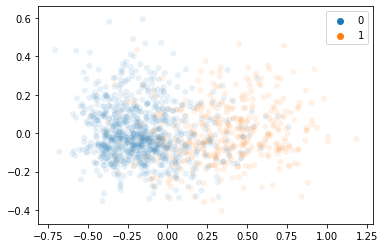

In [16]:
plot_representation(model, test)

## Classifcation Trial